# Frequency NGRAMS -  Times Digital Archive


The key here is to have a look at what we are getting with the track of each individual series - by plotting  the mention of each term over time - giving them each individual term a line in the graph. So we can see if the use of terms changes over time


### Loading the necessary libraries

In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
NON_AZ_REGEXP = re.compile('[^a-z]')

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200

### Functions

In [3]:
def normalize(word):
    """
    Normalize a word by converting it to lower-case and removing all
    characters that are not 'a',...,'z'.
    :param word: Word to normalize
    :type word: str or unicode
    :return: normalized word
    :rtype word: str or unicode
    """
    return re.sub(NON_AZ_REGEXP, '', word.lower())

In [4]:
def lemmatize(word):
    """
    Lemmatize a word, using a lexical knowledge bases to get the
    correct base forms of a word.
    Like stemming, lemmatization reduces inflectional forms to a
    common base form. As opposed to stemming, lemmatization does not
    simply chop off inflections. Instead it uses lexical knowledge
    bases to get the correct base forms of words.
    :param word: Word to normalize
    :type word: str or unicode
    :return: normalized word
    :rtype word: str or unicode
    """
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

In [5]:
def freq_count(results):
    freq_count={}
    for year in results:
        for i in results[year]:
            if i[0] not in freq_count:
                freq_count[i[0]]={}
                freq_count[i[0]][year]=i[1]
                
            else:
                if year not in freq_count[i[0]]:
                    freq_count[i[0]][year]=i[1]
                else:    
                    freq_count[i[0]][year]+=i[1]
    return freq_count

In [6]:
def normalize_freq(publication, freq_results, view_terms):
    plt.figure(figsize=(20,8))
    years=set()
    for term in view_terms:
        if term in freq_results:
            normed_results = {}
            for year in freq_results[term]:
                if year>0:
                    normed_results[year] = (freq_results[term][year]* len(term.split()))/float(publication[year][2])
                    years.add(year)
            plt.plot(*zip(*sorted(normed_results.items())), label=term, lw = 2, alpha = 1, marker="X")
    x_years=sorted(list(years))
    plt.xticks(np.arange(min(x_years), max(x_years)+1, 2.0), rotation=45) 
    plt.ticklabel_format(style = 'plain')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.legend(loc='upper left')
    plt.xlabel("Years")
    plt.ylabel("Normalized Frequency")
    plt.show()       

In [7]:
def read_query_results(filename):
    with open('./results_TDA/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [8]:
def plot_freq_count(freq_results, view_terms):
    plt.figure(figsize=(20,8))
    years=set()
    for term in view_terms:
        if term in freq_results:
            plt.plot(*zip(*sorted(freq_results[term].items())), label=term, lw = 2, alpha = 1, marker="X")
            for y in freq_results[term].keys(): 
                years.add(y)     
    x_years=sorted(list(years))
    plt.xticks(np.arange(min(x_years), max(x_years)+1, 2.0), rotation=45) 
    plt.ticklabel_format(style = 'plain')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.xlabel("Years")
    plt.show()

In [9]:
def plot_norm(publication, element):
    plt.figure(figsize=(20,8))
    num_element={}
    years=set()
    for year in publication:
        if element == "words":
            num_element[year]=publication[year][2]
        elif element == "articles":
            num_element[year]=publication[year][1]
        else:
            num_element[year]=publication[year][0]
        years.add(year)  
    plt.plot(*zip(*sorted(num_element.items())), label=element, lw = 2, alpha = 1, marker="X")
    x_years=sorted(list(years))
    plt.xticks(np.arange(min(x_years), max(x_years)+1, 2.0), rotation=45) 
    plt.ticklabel_format(style = 'plain')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.legend(loc='upper left')
    plt.ylabel('Number of ' + element + 'per volumne')
    plt.xlabel("Years")

    plt.show()
    return num_element, years

## 1. Normalised Query

First we examine the total number of issues, articles and words published over the period to see how much our search terms are affected by the way that published increases over the measurement period.

The query return the results in this format:

    {
      <YEAR>: [<NUM_ISSUES>, <NUM_ARTICLES>, <NUM_WORDS>],
      ...
    }

In [10]:
norm_publication=read_query_results('results_norm_tda')

#for printing the values, we are going to sort the values 
# by the years and just visualizing the first 10 years . 
#e.g --> First: 1785 year, with 255 issues, 4363 articles, and 3871604 words. 
#e.g --> Last: 1786 year, with 291 issues , 5488 articles and 4495019 words.

sorted(norm_publication.items())[:]

/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


[(1785, [255, 4363, 3871604]),
 (1786, [291, 5488, 4495019]),
 (1787, [313, 7157, 4635125]),
 (1788, [314, 7419, 4693363]),
 (1789, [313, 7624, 4783383]),
 (1790, [313, 8438, 5117325]),
 (1791, [313, 7000, 5135935]),
 (1792, [313, 6595, 4973208]),
 (1793, [309, 7056, 5347444]),
 (1794, [313, 6569, 5439889]),
 (1795, [313, 6582, 5394305]),
 (1796, [314, 6378, 5354892]),
 (1797, [312, 6272, 5405719]),
 (1798, [294, 6375, 5274854]),
 (1799, [313, 6433, 5948517]),
 (1800, [313, 6481, 5854394]),
 (1801, [313, 5700, 5897649]),
 (1802, [313, 6795, 5843547]),
 (1803, [306, 6098, 5389811]),
 (1804, [313, 6285, 6610196]),
 (1805, [313, 6065, 5465358]),
 (1806, [313, 6815, 5907852]),
 (1807, [313, 6152, 6963878]),
 (1808, [314, 6122, 5288979]),
 (1809, [311, 6134, 6496522]),
 (1810, [313, 6138, 6144360]),
 (1811, [313, 7762, 7974974]),
 (1812, [314, 7639, 8341928]),
 (1813, [313, 7179, 6766348]),
 (1814, [313, 6727, 5964623]),
 (1815, [312, 7348, 10529278]),
 (1816, [314, 7225, 9069931]),
 (1817,

In order to set the scene and visualize how the issues, articles and words grew over the time, we are going to plot three basic graphs:        
- number of issues over time per year
- number of articles over time per year
- number of words over time per year
      

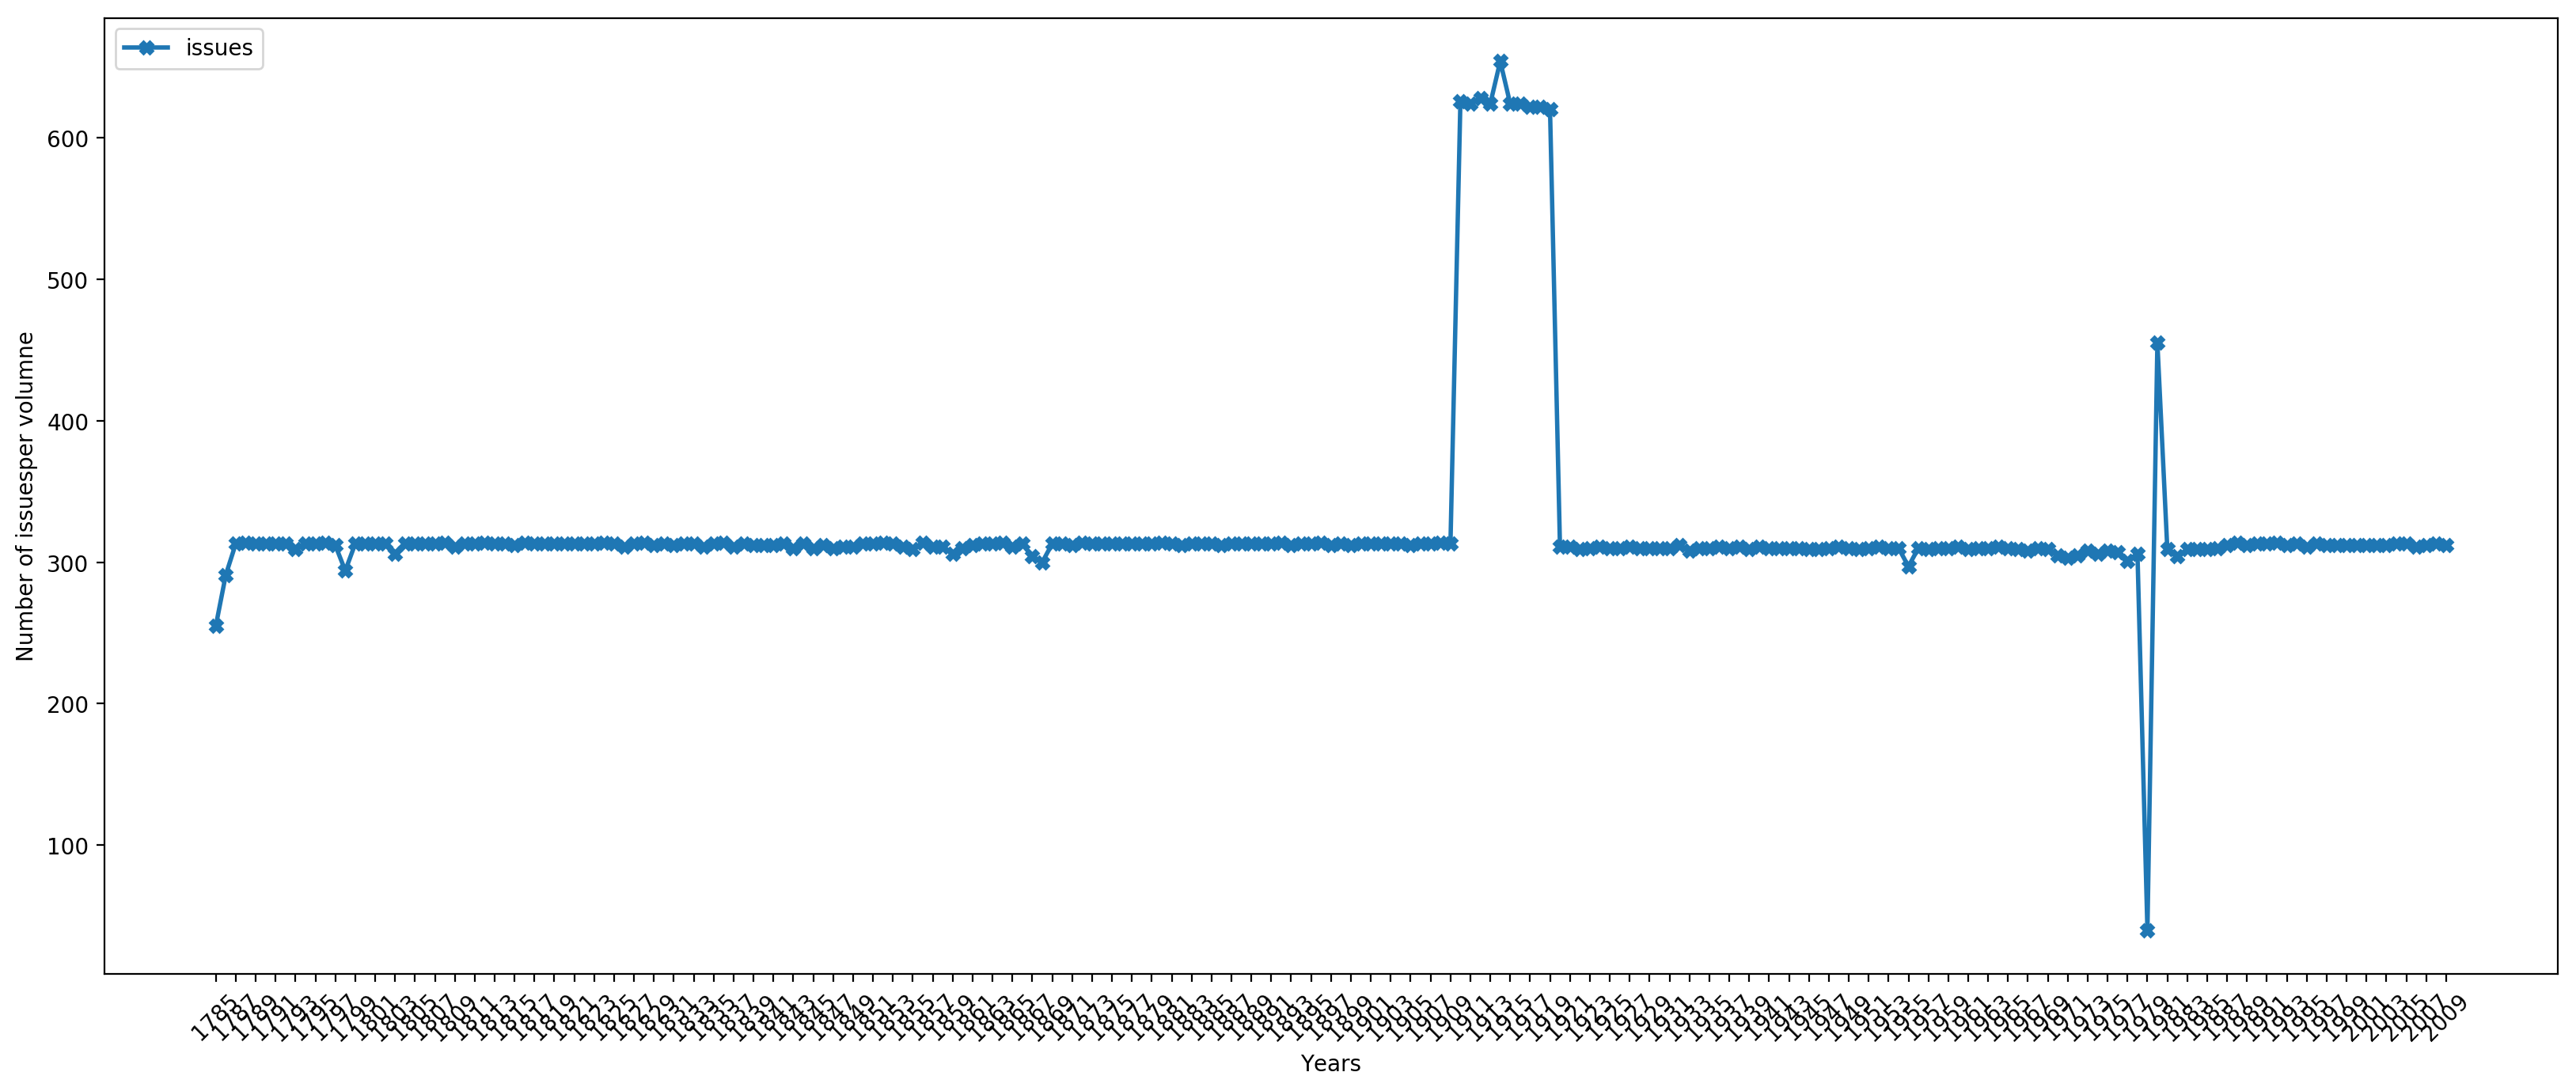

In [11]:
#Plot the variation of number of issues
num_issues, issues_years = plot_norm(norm_publication, "issues")


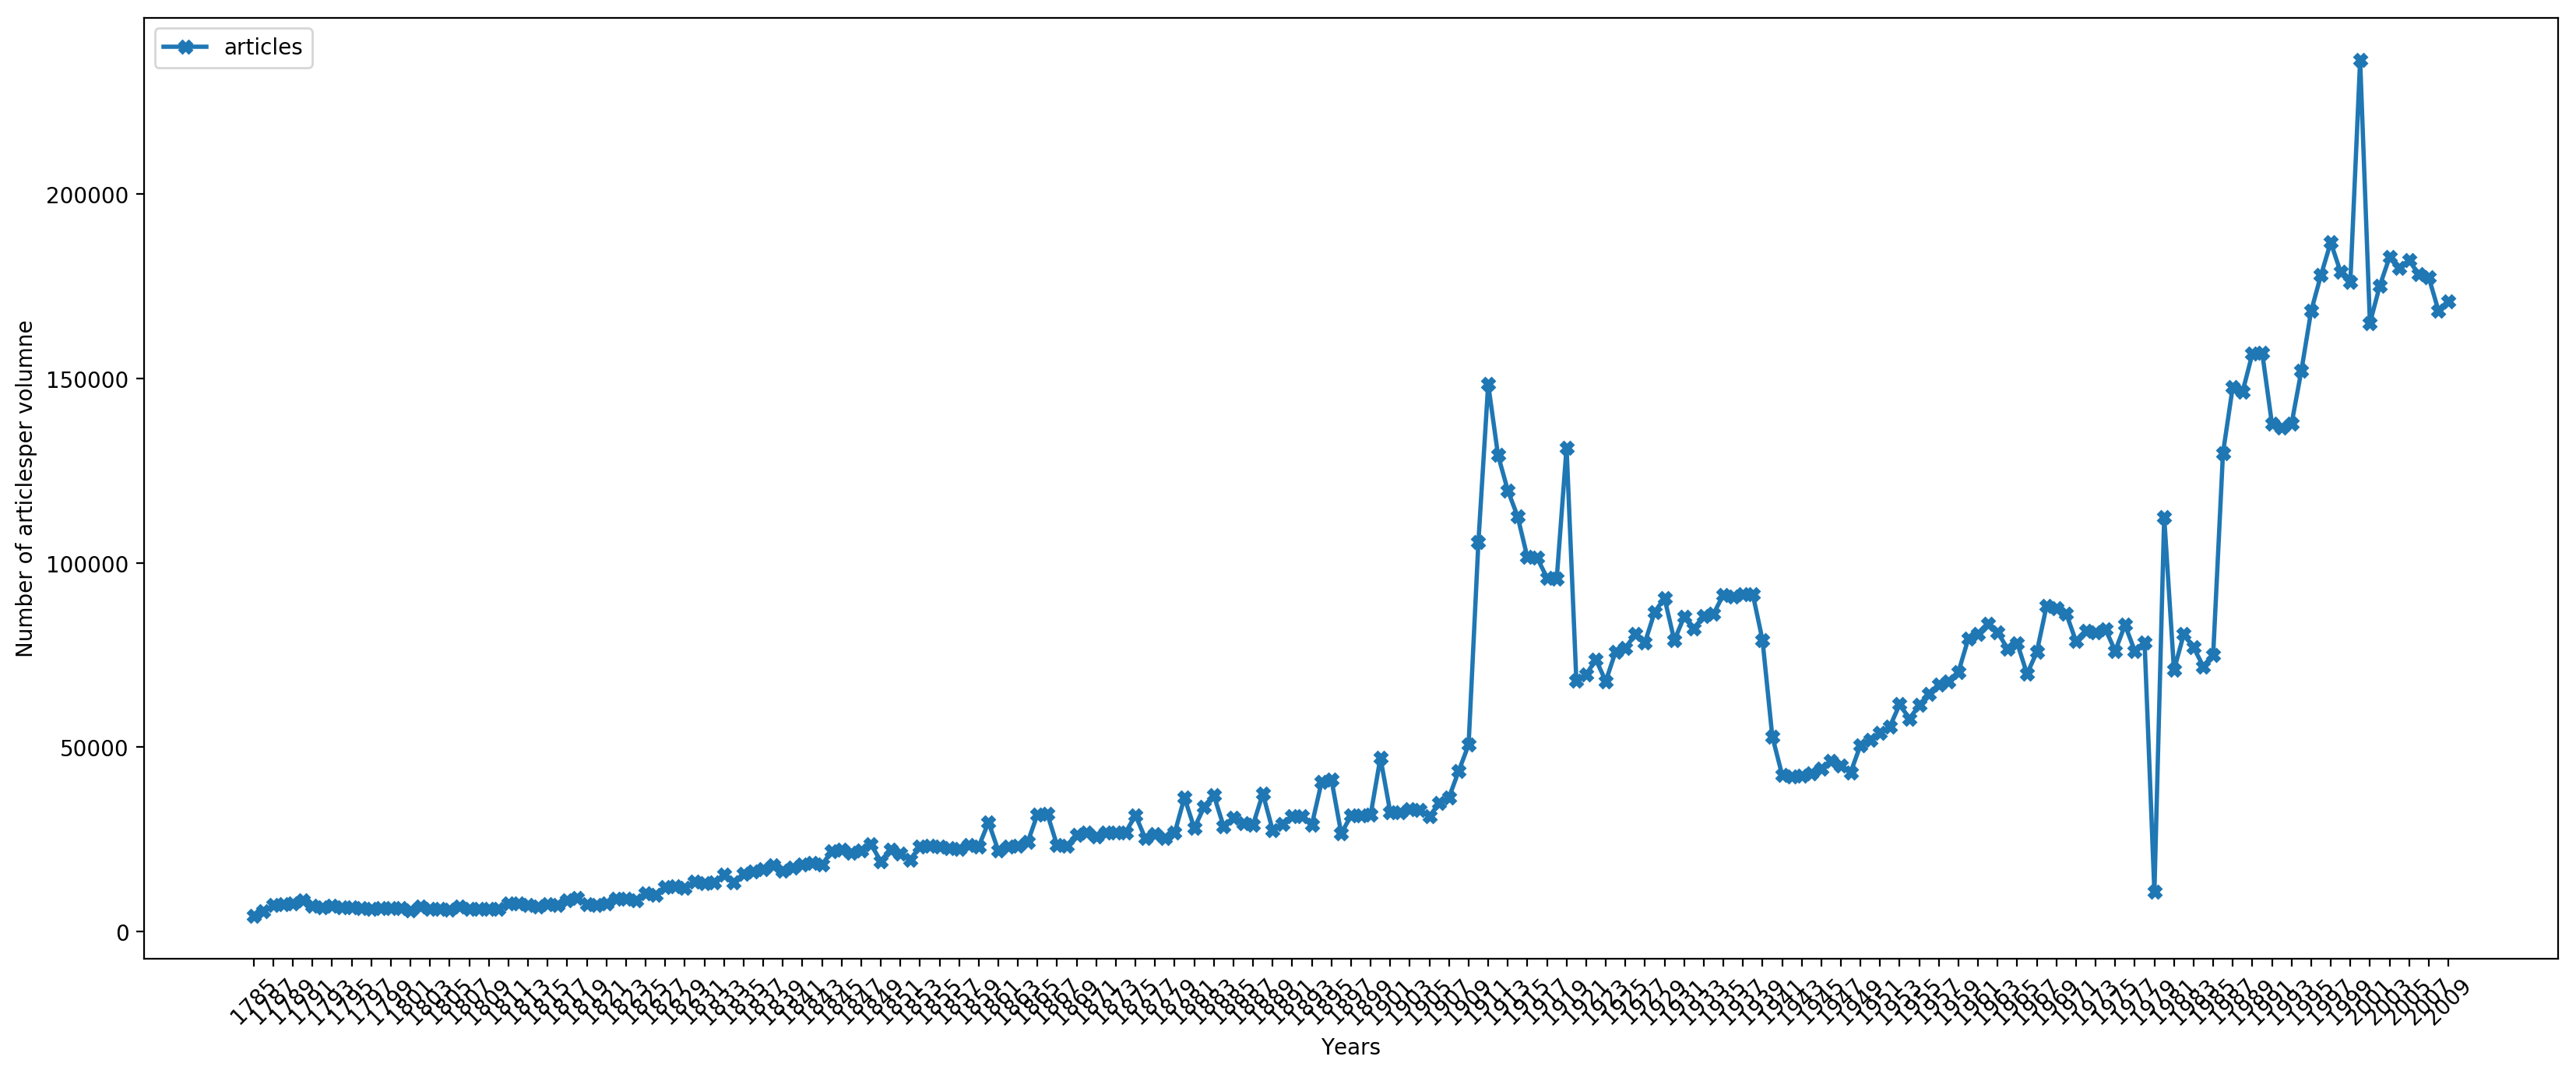

In [12]:
#Plot the variation of number of articles
num_articles, articles_years = plot_norm(norm_publication, "articles")

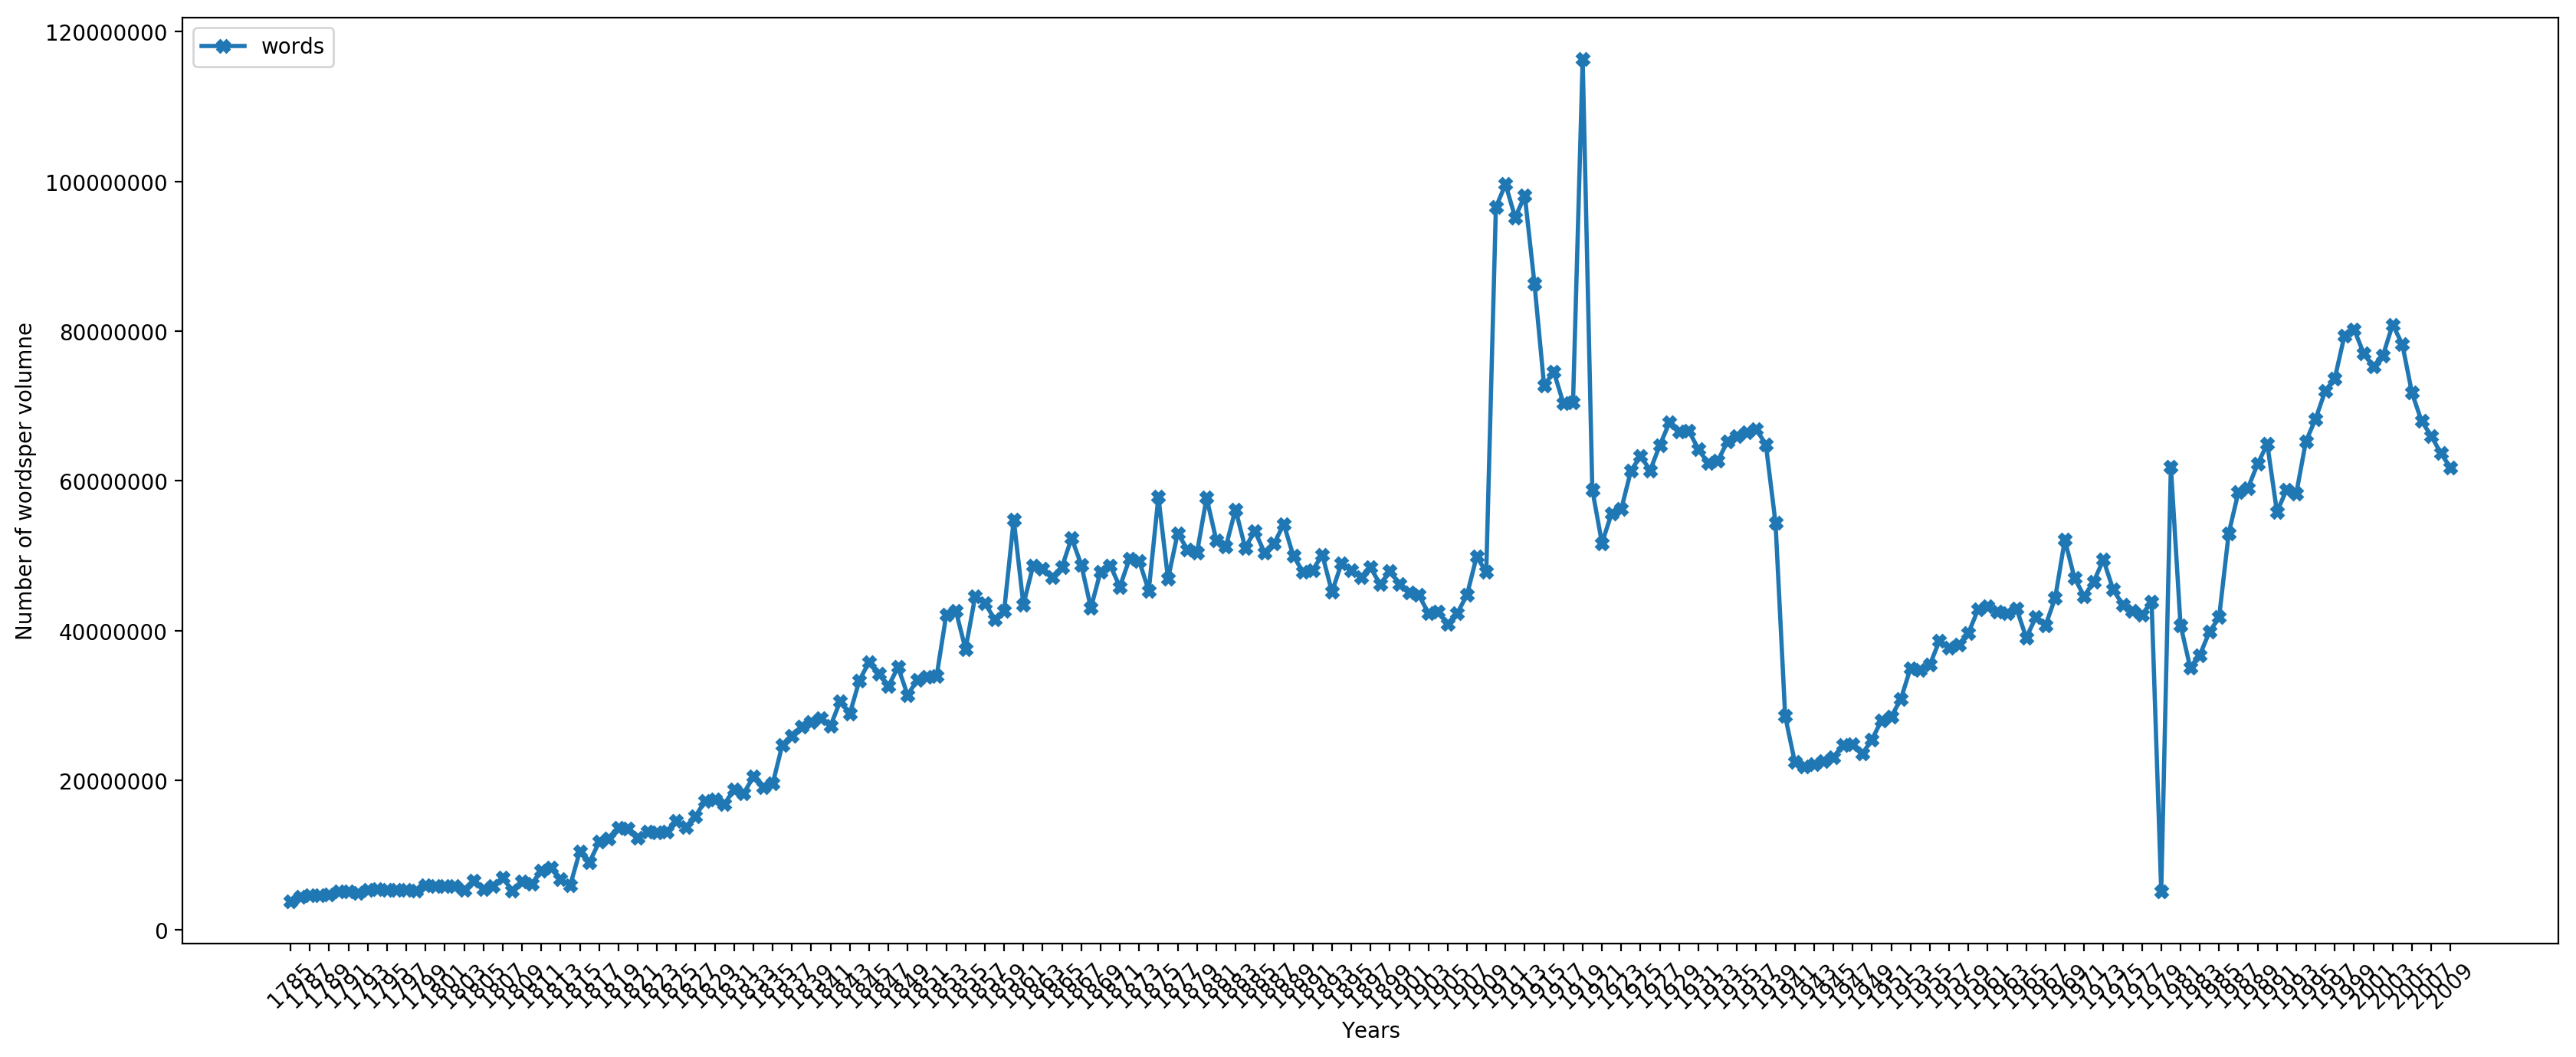

In [13]:
#Plot the variation of number of words 
num_words, words_years = plot_norm(norm_publication, "words")

## 2. Distribution of terms over time

We count the total number of words per year, and then count total instances of each query's search terms in it. 

And then, we **plot normalised frequency** (by words) on a graph (x axis is years), to see whether a term is becoming more or less popular with time. 

Also, we have included the plots of the **raw frequencies** (without normalising the results)

**Target_words**:
     - Science, Research, Human, Study


All the words (query's search terms and TDA words) have been **normalized** (lower case, and remove everything that is not a letter). 

**Query search terms**: 
    - Eugenics, Employment resistant, Burden, Rational design, Gene editing, Disposition to violence, Disposition to, alcoholism, Disposition to psychopathy, Moral obligation, Ethically better children, IVF, I.V.F, In Vitro, Fertilisation, Embryos, Genes, Genetic modification, Scientifically guided conception, Human gene editing, Consumer, eugenics, Liberal eugenics, Genetically modified human, Engineer genes, Gene engineering, Genetic engineering, CRISPR-Cas9, CRISPR, Human enhancement, Moral enhancement, Enhancement, Enhancing evolution, Cognitive enhancement, Procreative beneficence, Eugenic science, Prenatal diagnosis, Gene-editing research, Germ line DNA modification, Germ, cells, Clean up, Ableism, Culling, Directed evolution, Dysgenics, Eugenic feminism, Genetic discrimination, Genetic enhancement, Euthenics, In vitro embryo selection, New eugenics, Somatotype, Constitutional psychology, gattaca, genoism, Pseudoscience, breeding, Scientific racism, Prenatal genetic testing, Perfecting humanity, Social Darwinism, New genetic technologies, Gene editing, Race, Race-betterment, Genetic determinism, Preimplanted embryos, Preimplantation genetic diagnosis, Cytoplasmic transfer, Gestational surrogacy, Human genetic engineering, Race realism, feeble-minded, sterilization, fatherhood, exterminate, imbeciles, defectives, weakling, idiot, feeble minded, drunken, poor, impure, pure, race, Nordic, aryan, insane, inferior, racial inferiors, defective, fit, unfit, undesirable, disabled, pureblood, ubermensch, unworthy of life, lives unworthy of life, lebensunwertes Leben, euthanising, euthanasia, good births, hereditary defective offspring, compulsory sterilization, Untermensch, Fewer children, Restrict welfare, Degeneration of the race, Neo-eugenics, Mentally Defective, Weak genes, Forced sterilisation, Breeding circulation, Nazi eugenics, Nazism, National Socialist, Marriage prohibition, Sprint, Boxing, IQ, Unfit to reproduce, Genetic quality, Fit to reproduce, Final solution, Human stock, Improving human stock, Racial mixing, Defective classes, Racial purity, Selective breeding, Racial hygiene, Hereditary biology, Social biology, Asexual, Morally defective, Francis Galton, Alexander Graham Bell, Margaret Sanger


    
**Note**: Since we have a high number of search terms, we have divided them in **5 taxonomies**, in order to improve visualizations. 

In [14]:
lexicon_string='Eugenics, Employment resistant, Burden, Rational design, Gene editing, Disposition to violence, Disposition to, alcoholism, Disposition to psychopathy, Moral obligation, Ethically better children, IVF, I.V.F, In Vitro, Fertilisation, Embryos, Genes, Genetic modification, Scientifically guided conception, Human gene editing, Consumer, eugenics, Liberal eugenics, Genetically modified human, Engineer genes, Gene engineering, Genetic engineering, CRISPR-Cas9, CRISPR, Human enhancement, Moral enhancement, Enhancement, Enhancing evolution, Cognitive enhancement, Procreative beneficence, Eugenic science, Prenatal diagnosis, Gene-editing research, Germ line DNA modification, Germ, cells, Clean up, Ableism, Culling, Directed evolution, Dysgenics, Eugenic feminism, Genetic discrimination, Genetic enhancement, Euthenics, In vitro embryo selection, New eugenics, Somatotype, Constitutional psychology, gattaca, genoism, Pseudoscience, breeding, Scientific racism, Prenatal genetic testing, Perfecting humanity, Social Darwinism, New genetic technologies, Gene editing, Race, Race-betterment, Genetic determinism, Preimplanted embryos, Preimplantation genetic diagnosis, Cytoplasmic transfer, Gestational surrogacy, Human genetic engineering, Race realism, feeble-minded, sterilization, fatherhood, exterminate, imbeciles, defectives, weakling, idiot, feeble minded, drunken, poor, impure, pure, race, Nordic, aryan, insane, inferior, racial inferiors, defective, fit, unfit, undesirable, disabled, pureblood, ubermensch, unworthy of life, lives unworthy of life, lebensunwertes Leben, euthanising, euthanasia, good births, hereditary defective offspring, compulsory sterilization, Untermensch, Fewer children, Restrict welfare, Degeneration of the race, Neo-eugenics, Mentally Defective, Weak genes, Forced sterilisation, Breeding circulation, Nazi eugenics, Nazism, National Socialist, Marriage prohibition, Sprint, Boxing, IQ, Unfit to reproduce, Genetic quality, Fit to reproduce, Final solution, Human stock, Improving human stock, Racial mixing, Defective classes, Racial purity, Selective breeding, Racial hygiene, Hereditary biology, Social biology, Asexual, Morally defective, Francis Galton, Alexander Graham Bell, Margaret Sanger'
lexicon= re.split('; |, |\*|\n',lexicon_string)

In [15]:
lexicon_norm=[]
for keysentence in lexicon:
    k_split = keysentence.split()
    sentence_word = [normalize(word) for word in k_split]
    sentence_norm = ''
    for word in sentence_word:
        if sentence_norm == '':
            sentence_norm = word
        else:
            sentence_norm += " " + word
    lexicon_norm.append(sentence_norm)

In [16]:
# ' '.join(lexicon_norm[120:]).replace(' - ', '')

#### Taxomomy_1

In [17]:
print("Terms used in Taxonomy 1: %s" %(' '.join(lexicon_norm[0:30]).replace(' ', ', ')))

Terms used in Taxonomy 1: eugenics, employment, resistant, burden, rational, design, gene, editing, disposition, to, violence, disposition, to, alcoholism, disposition, to, psychopathy, moral, obligation, ethically, better, children, ivf, ivf, in, vitro, fertilisation, embryos, genes, genetic, modification, scientifically, guided, conception, human, gene, editing, consumer, eugenics, liberal, eugenics, genetically, modified, human, engineer, genes, gene, engineering, genetic, engineering, crisprcas, crispr, human, enhancement


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


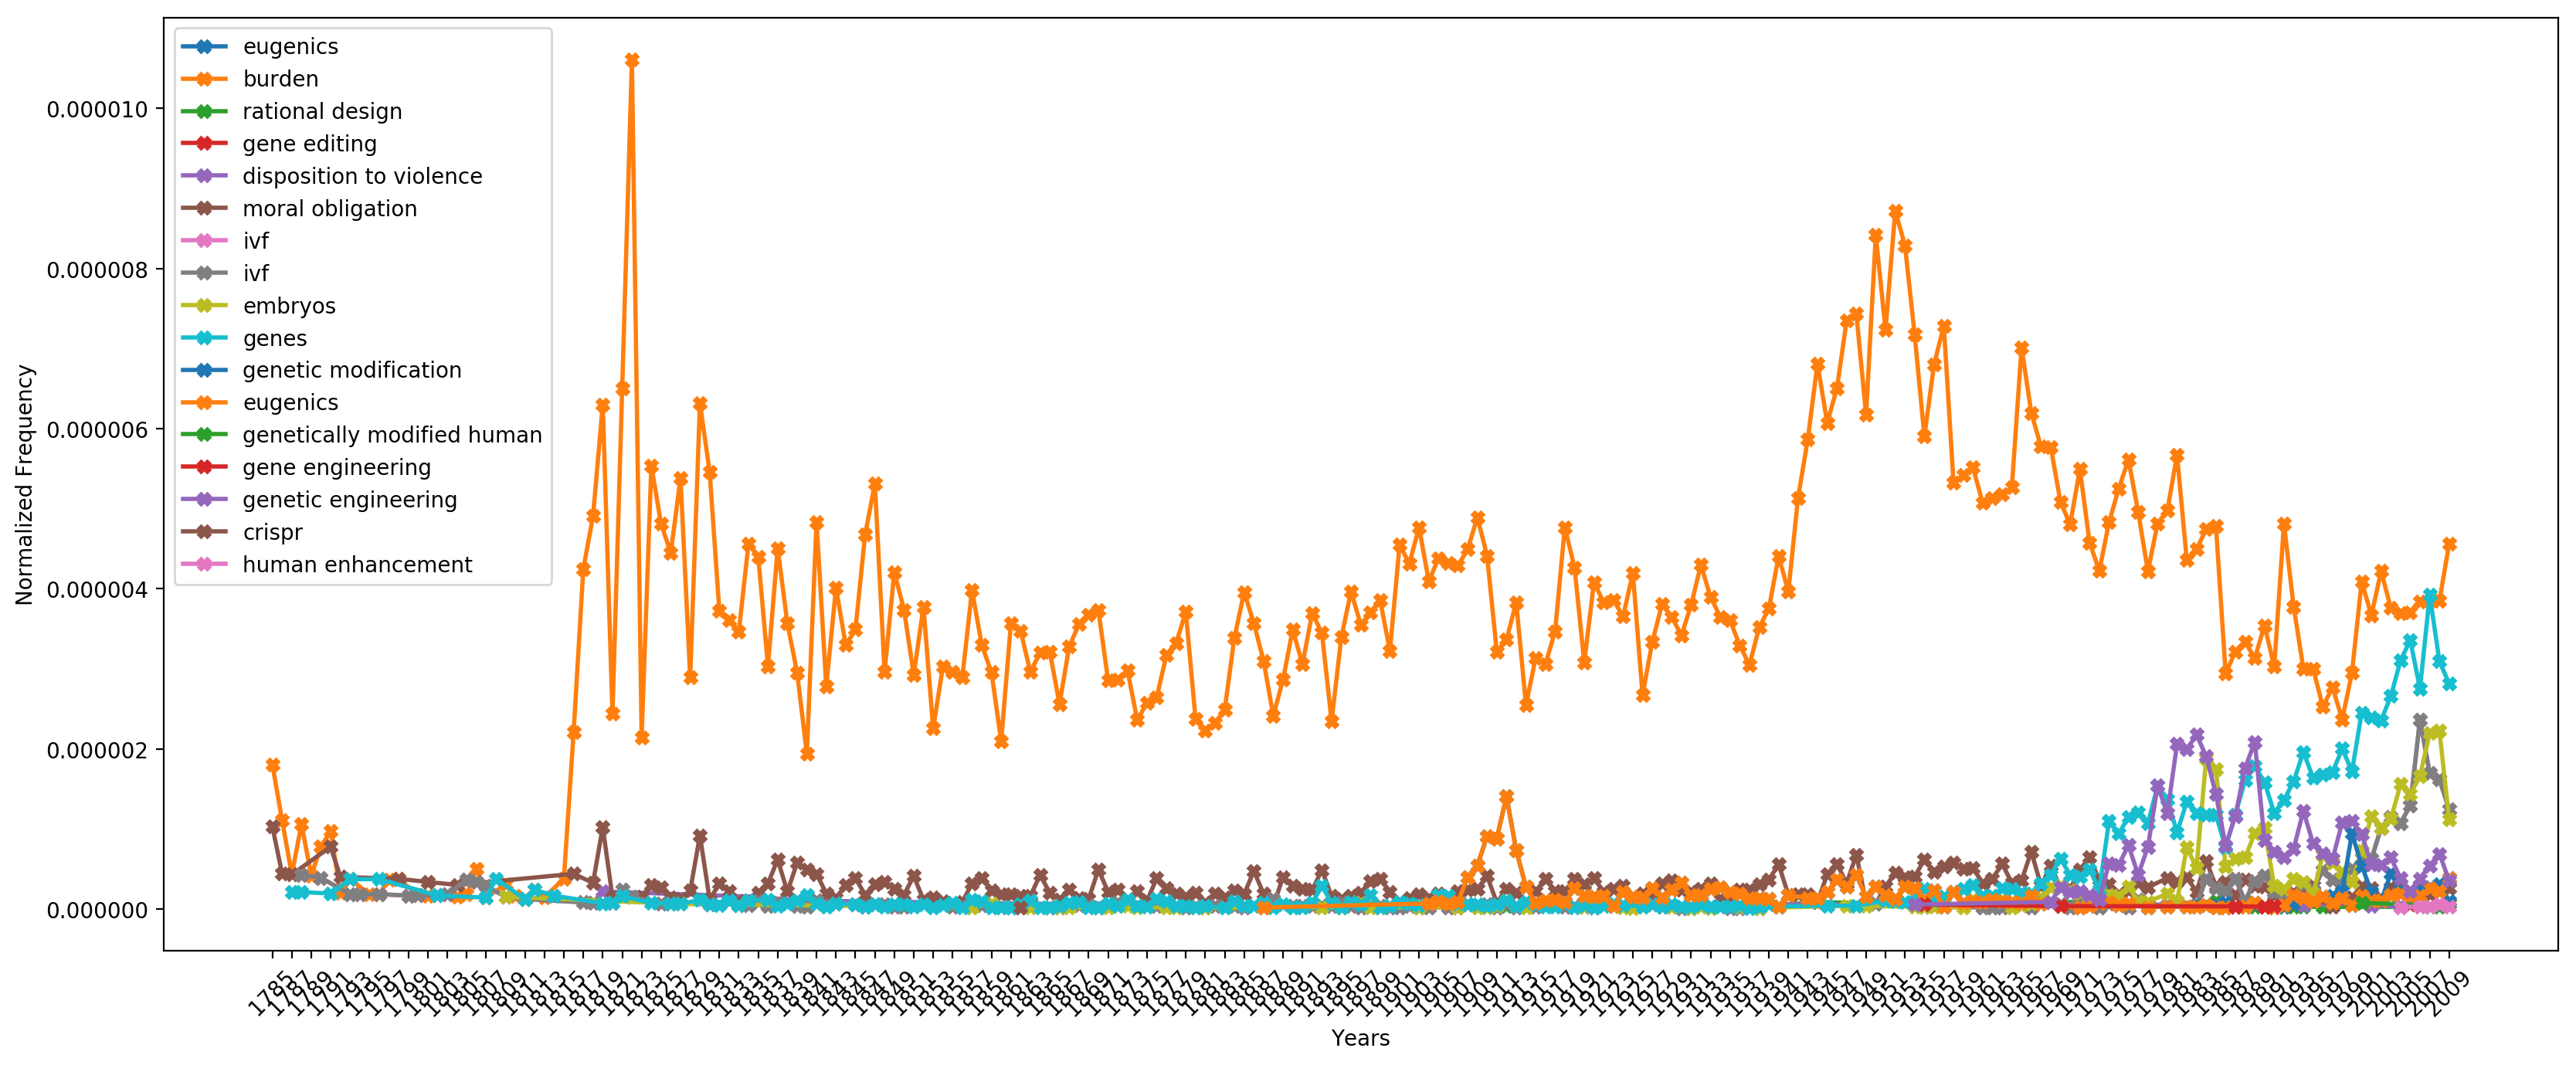

In [18]:
taxonomy_1= lexicon_norm[0:30]

query_results=read_query_results('results_science_norm')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_1
normalize_freq(norm_publication, freq_count_norm, taxonomy_1)

####  Without normalising - Visualising the raw frequencies  of taxonomy 1

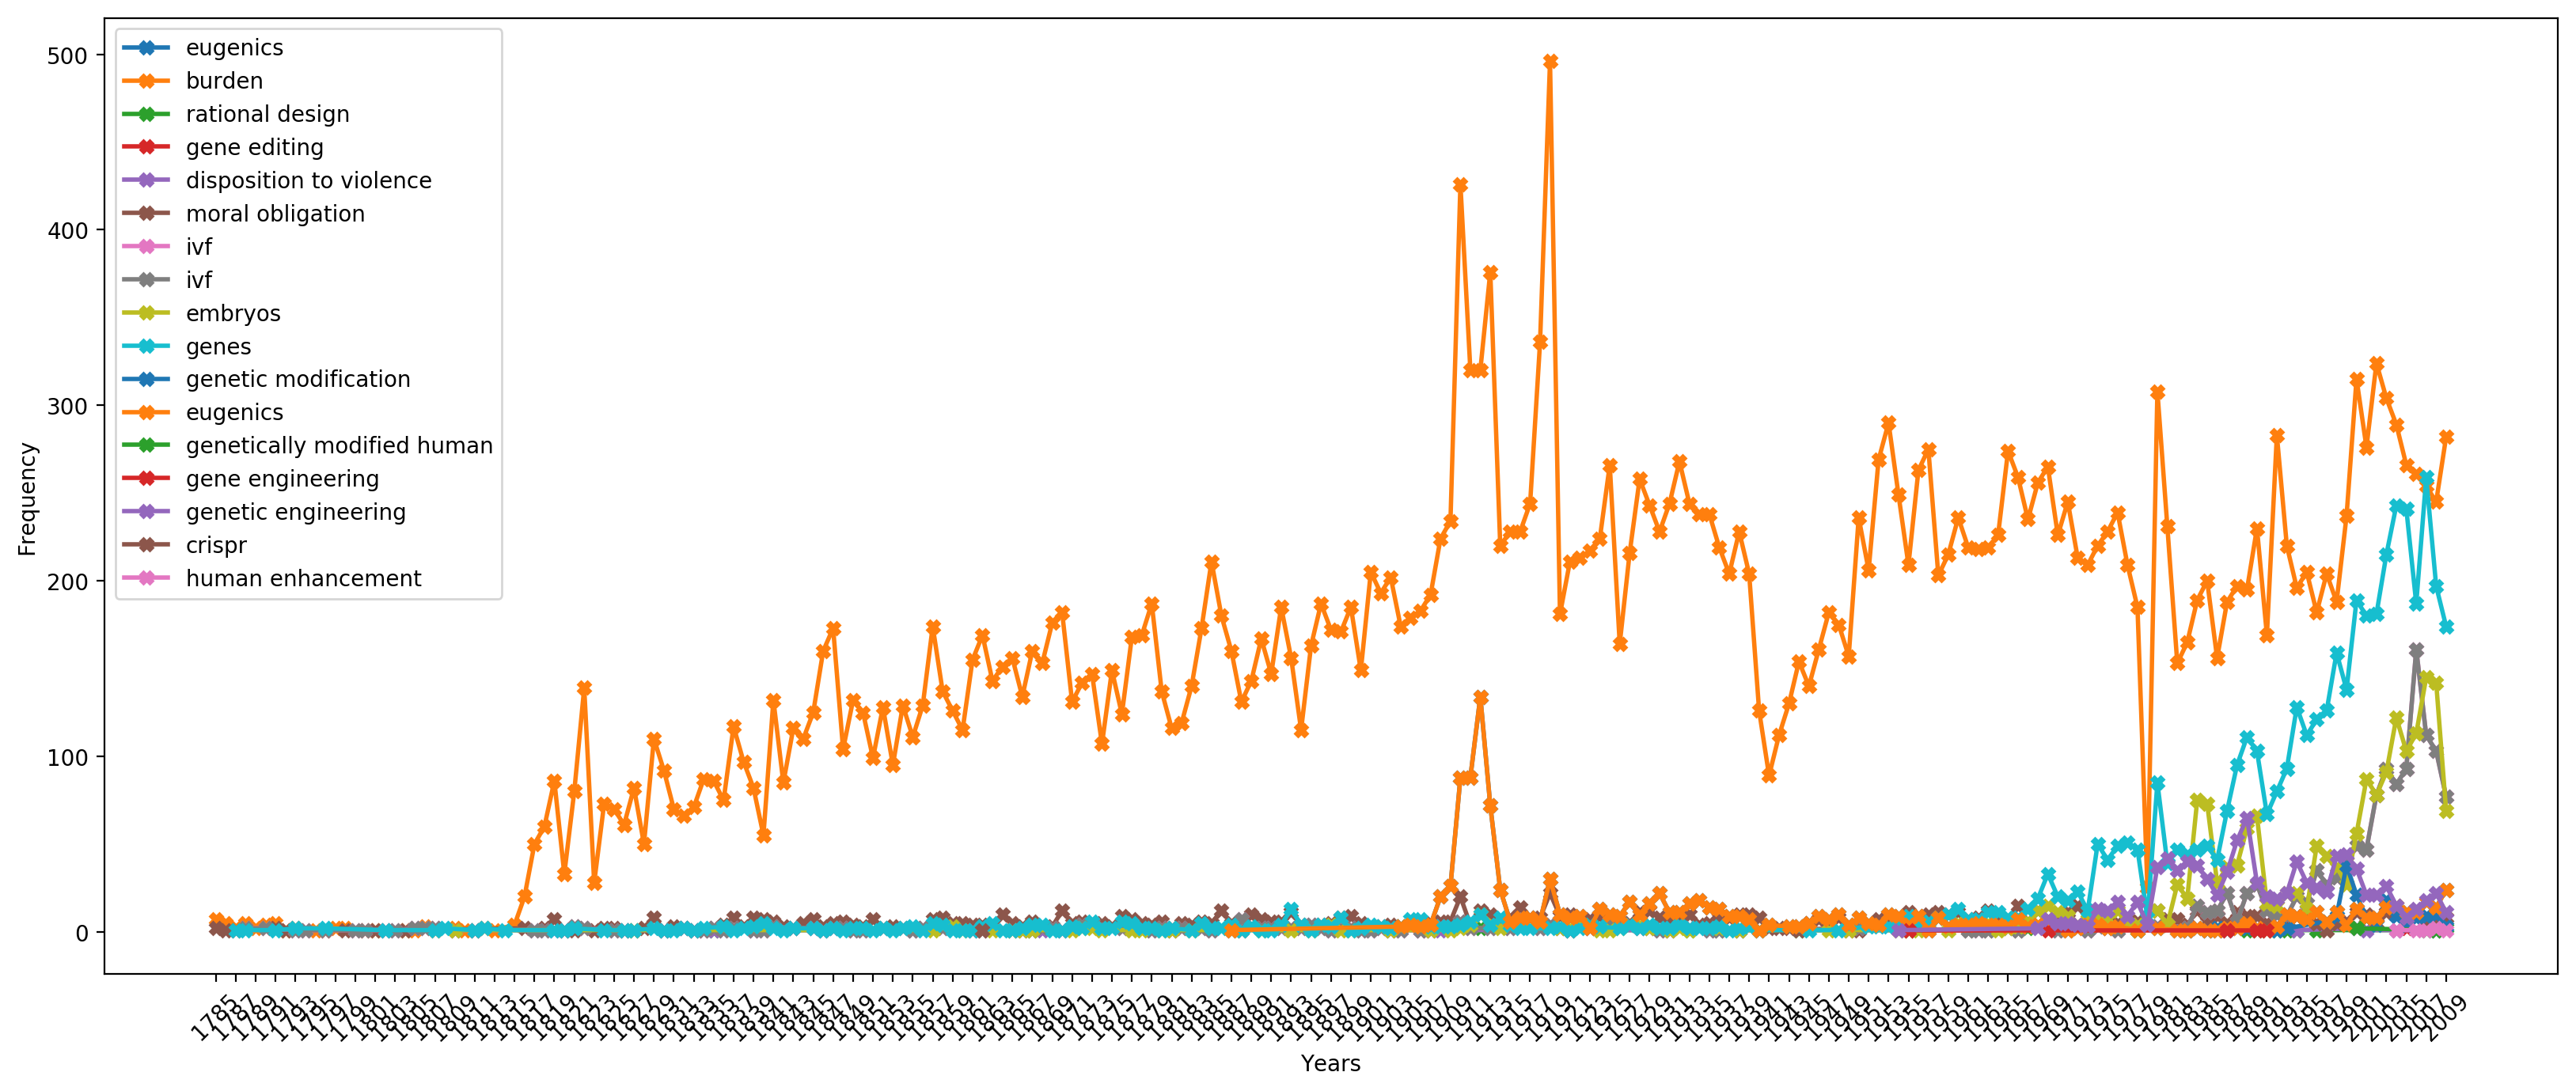

In [19]:
plot_freq_count(freq_count_norm, taxonomy_1)

#### Taxomomy_2:

In [20]:
print("Terms used in Taxonomy 2: %s" %(' '.join(lexicon_norm[30:60]).replace(' ', ', ')))

Terms used in Taxonomy 2: moral, enhancement, enhancement, enhancing, evolution, cognitive, enhancement, procreative, beneficence, eugenic, science, prenatal, diagnosis, geneediting, research, germ, line, dna, modification, germ, cells, clean, up, ableism, culling, directed, evolution, dysgenics, eugenic, feminism, genetic, discrimination, genetic, enhancement, euthenics, in, vitro, embryo, selection, new, eugenics, somatotype, constitutional, psychology, gattaca, genoism, pseudoscience, breeding, scientific, racism, prenatal, genetic, testing


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


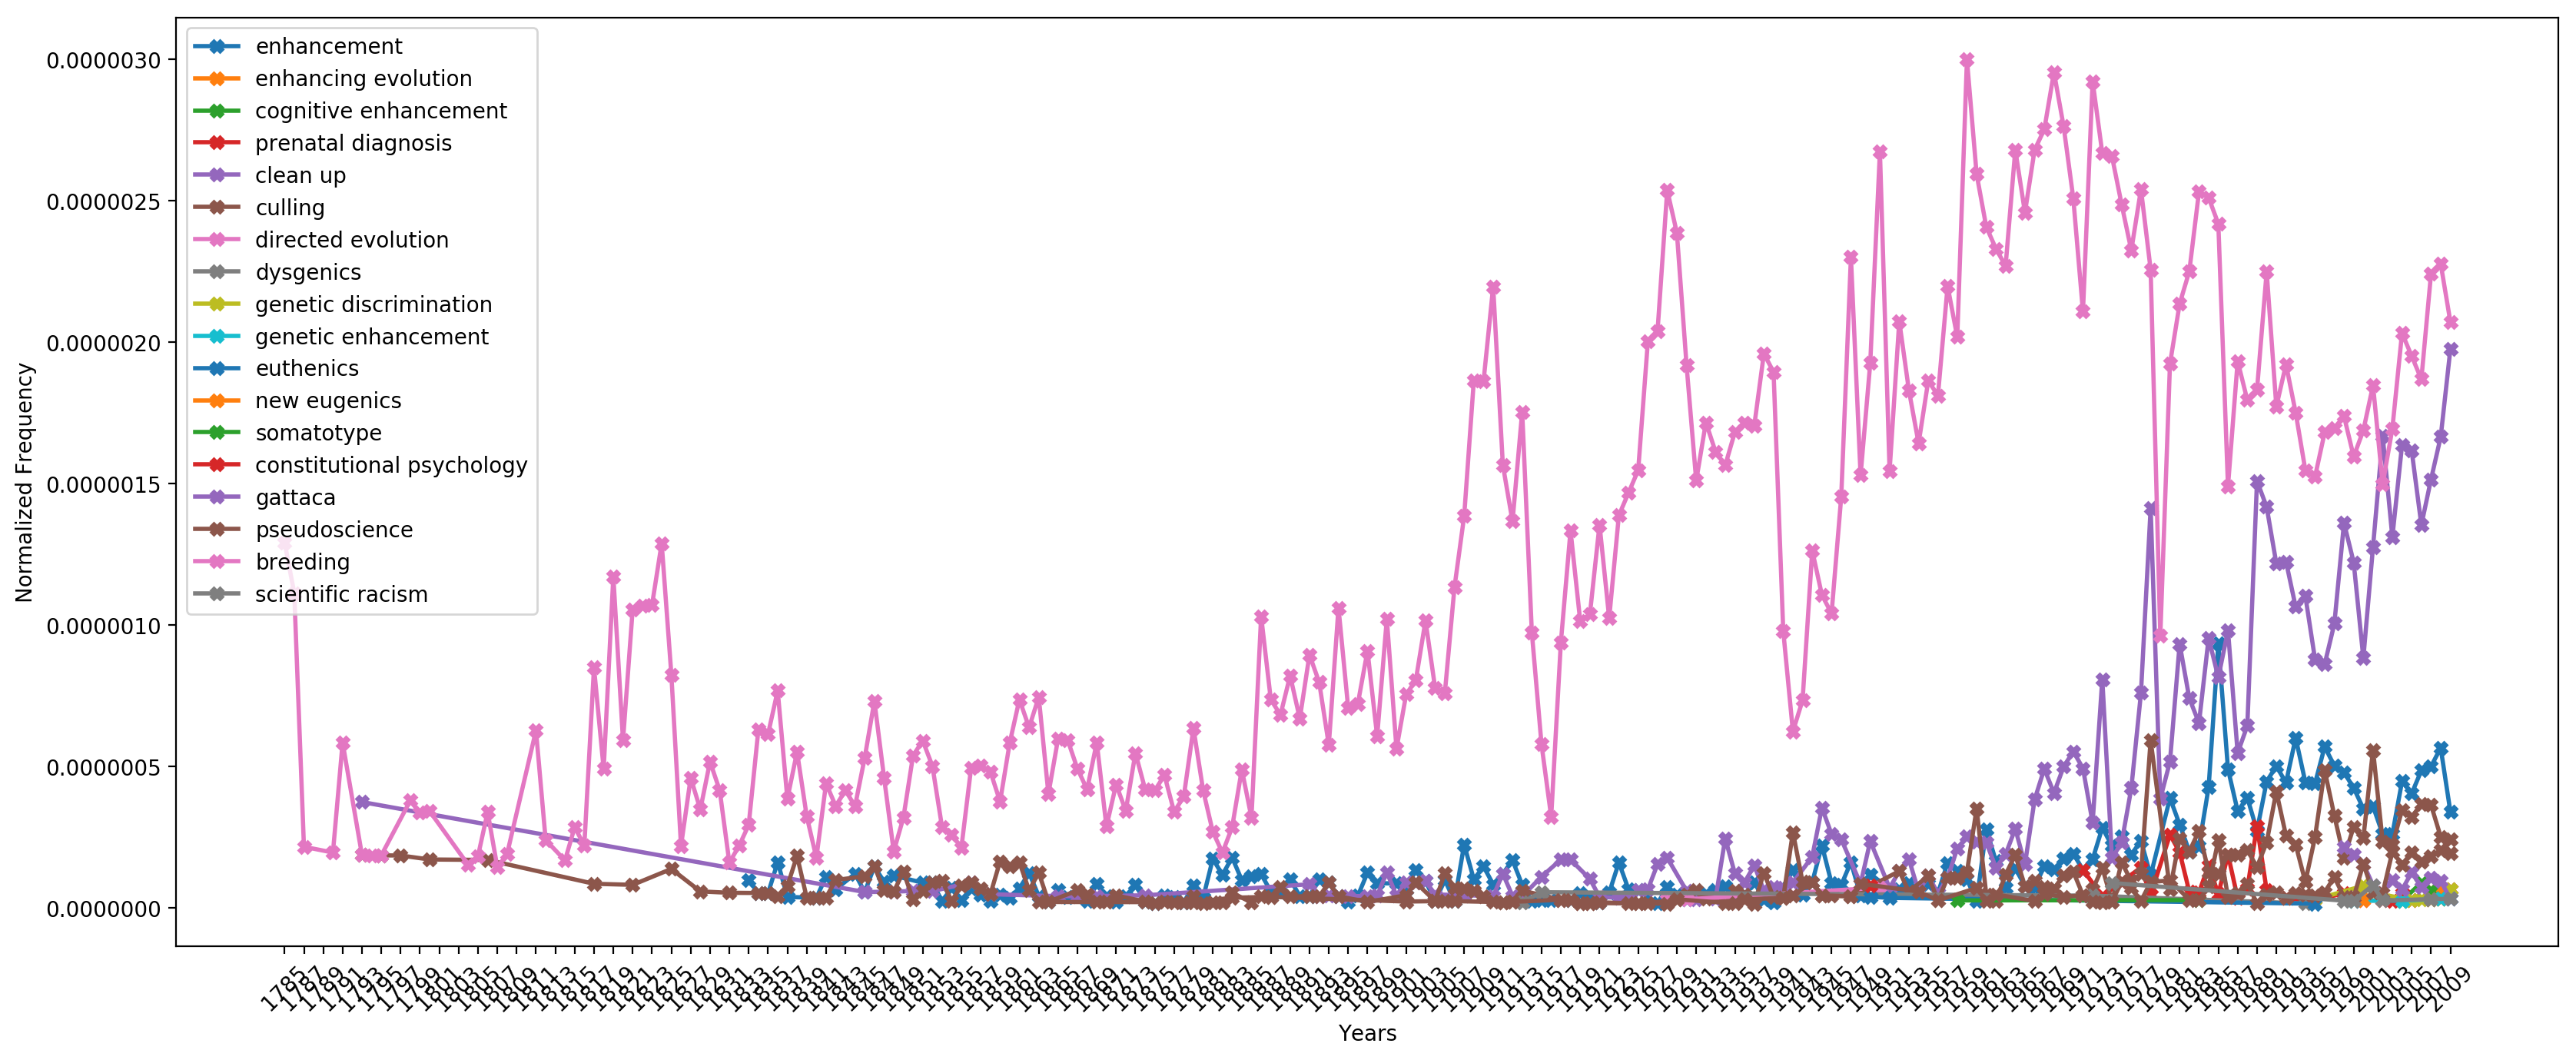

In [21]:
taxonomy_2= lexicon_norm[30:60]

query_results=read_query_results('results_science_norm')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_2
normalize_freq(norm_publication, freq_count_norm, taxonomy_2)

#### Without normalising - Visualising the raw frequencies of taxonomy 2

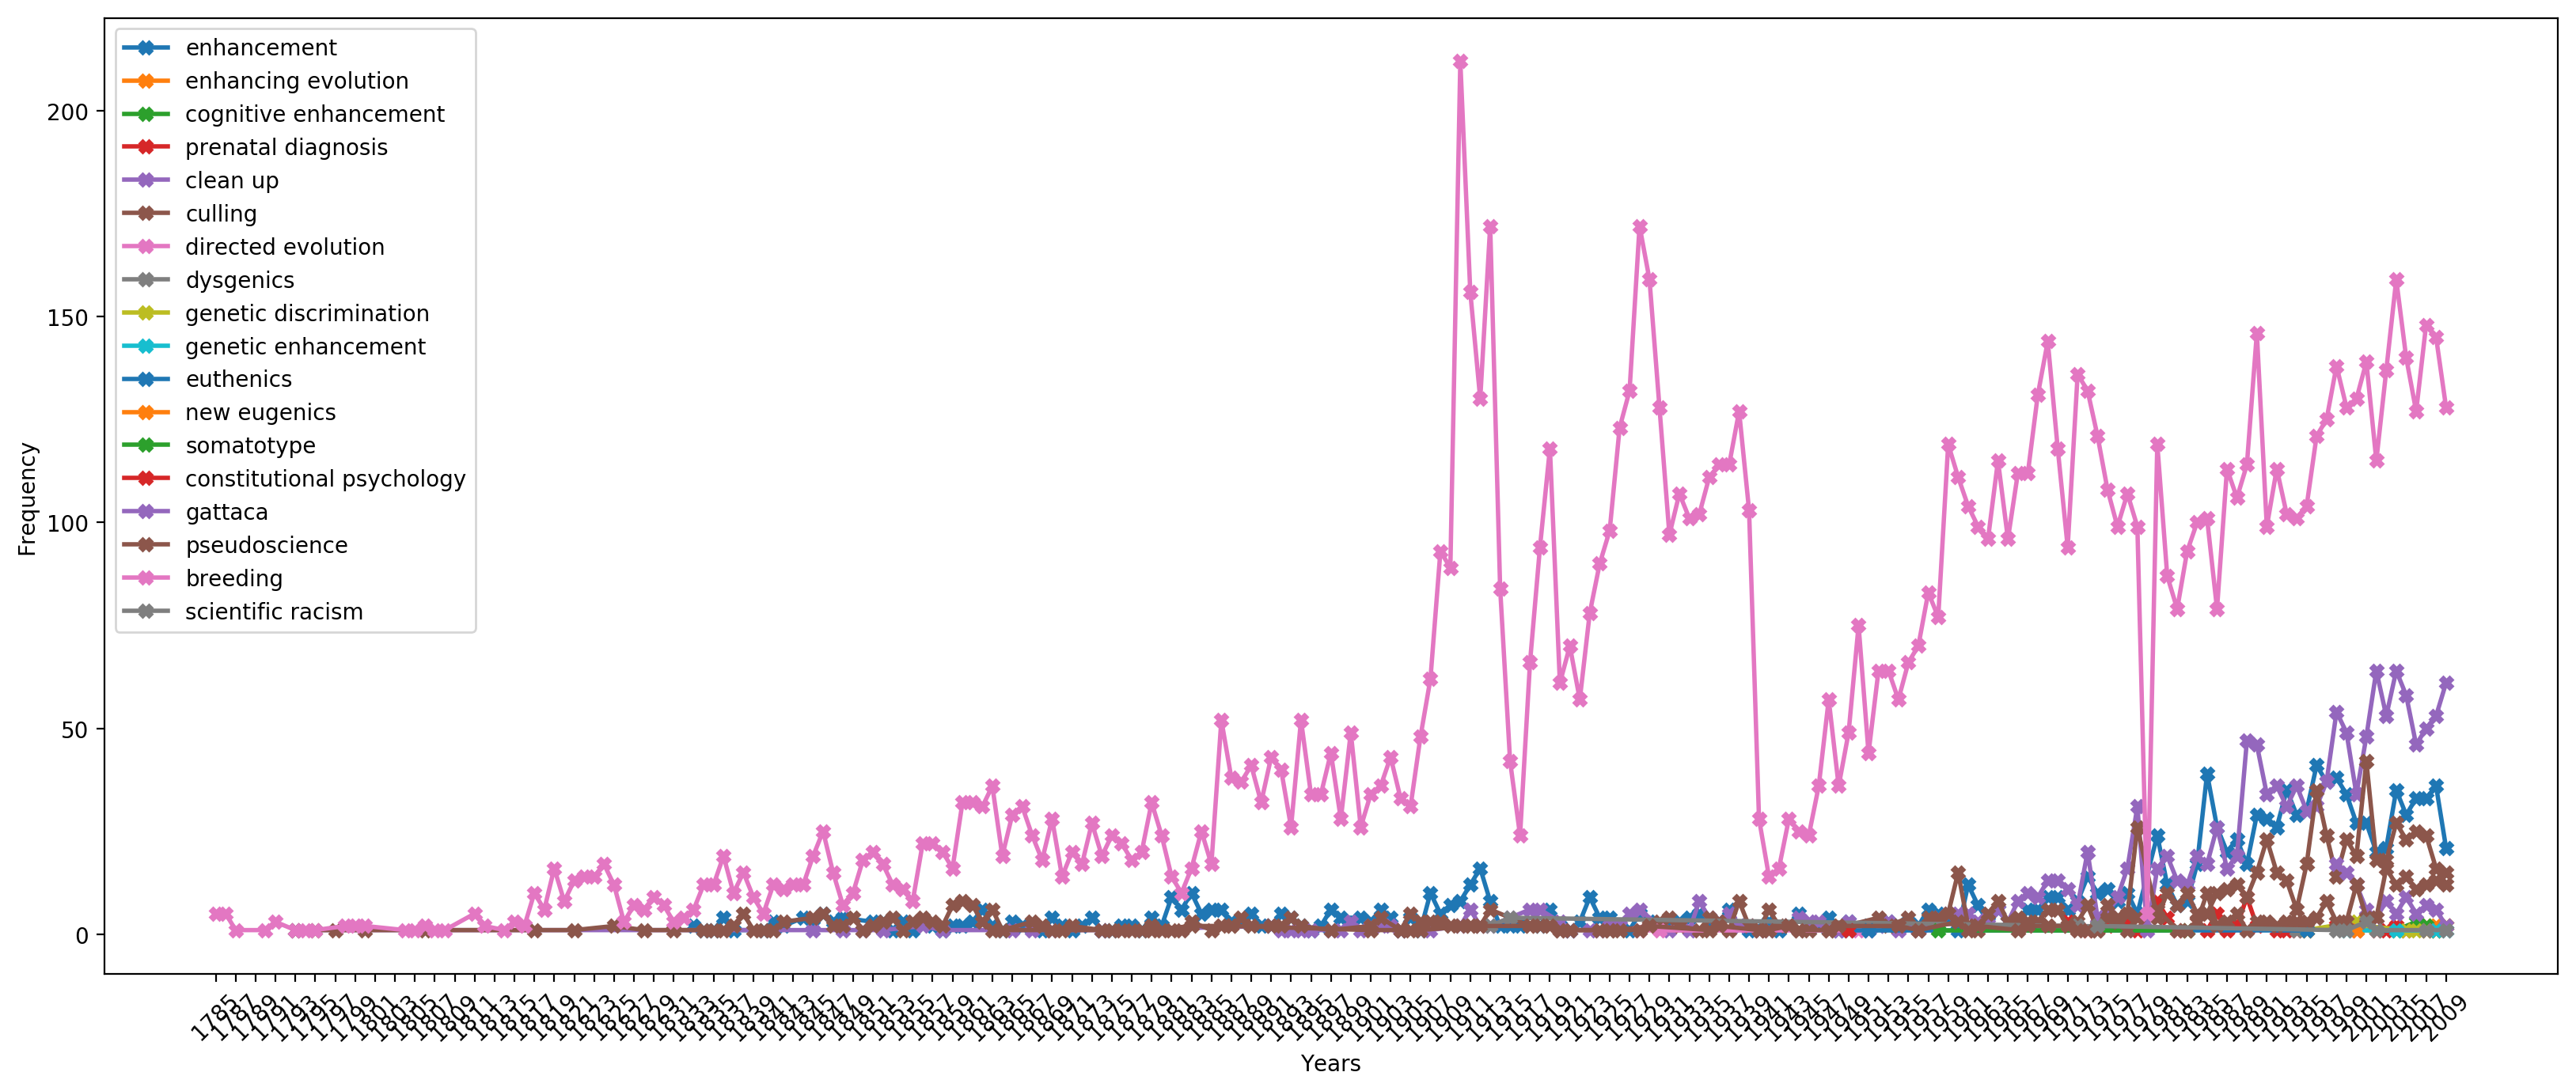

In [22]:
plot_freq_count(freq_count_norm, taxonomy_2)

#### Taxomomy_3

In [23]:
print("Terms used in Taxonomy 3: %s" %(' '.join(lexicon_norm[60:90]).replace(' ', ', ')))

Terms used in Taxonomy 3: perfecting, humanity, social, darwinism, new, genetic, technologies, gene, editing, race, racebetterment, genetic, determinism, preimplanted, embryos, preimplantation, genetic, diagnosis, cytoplasmic, transfer, gestational, surrogacy, human, genetic, engineering, race, realism, feebleminded, sterilization, fatherhood, exterminate, imbeciles, defectives, weakling, idiot, feeble, minded, drunken, poor, impure, pure, race, nordic, aryan, insane


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


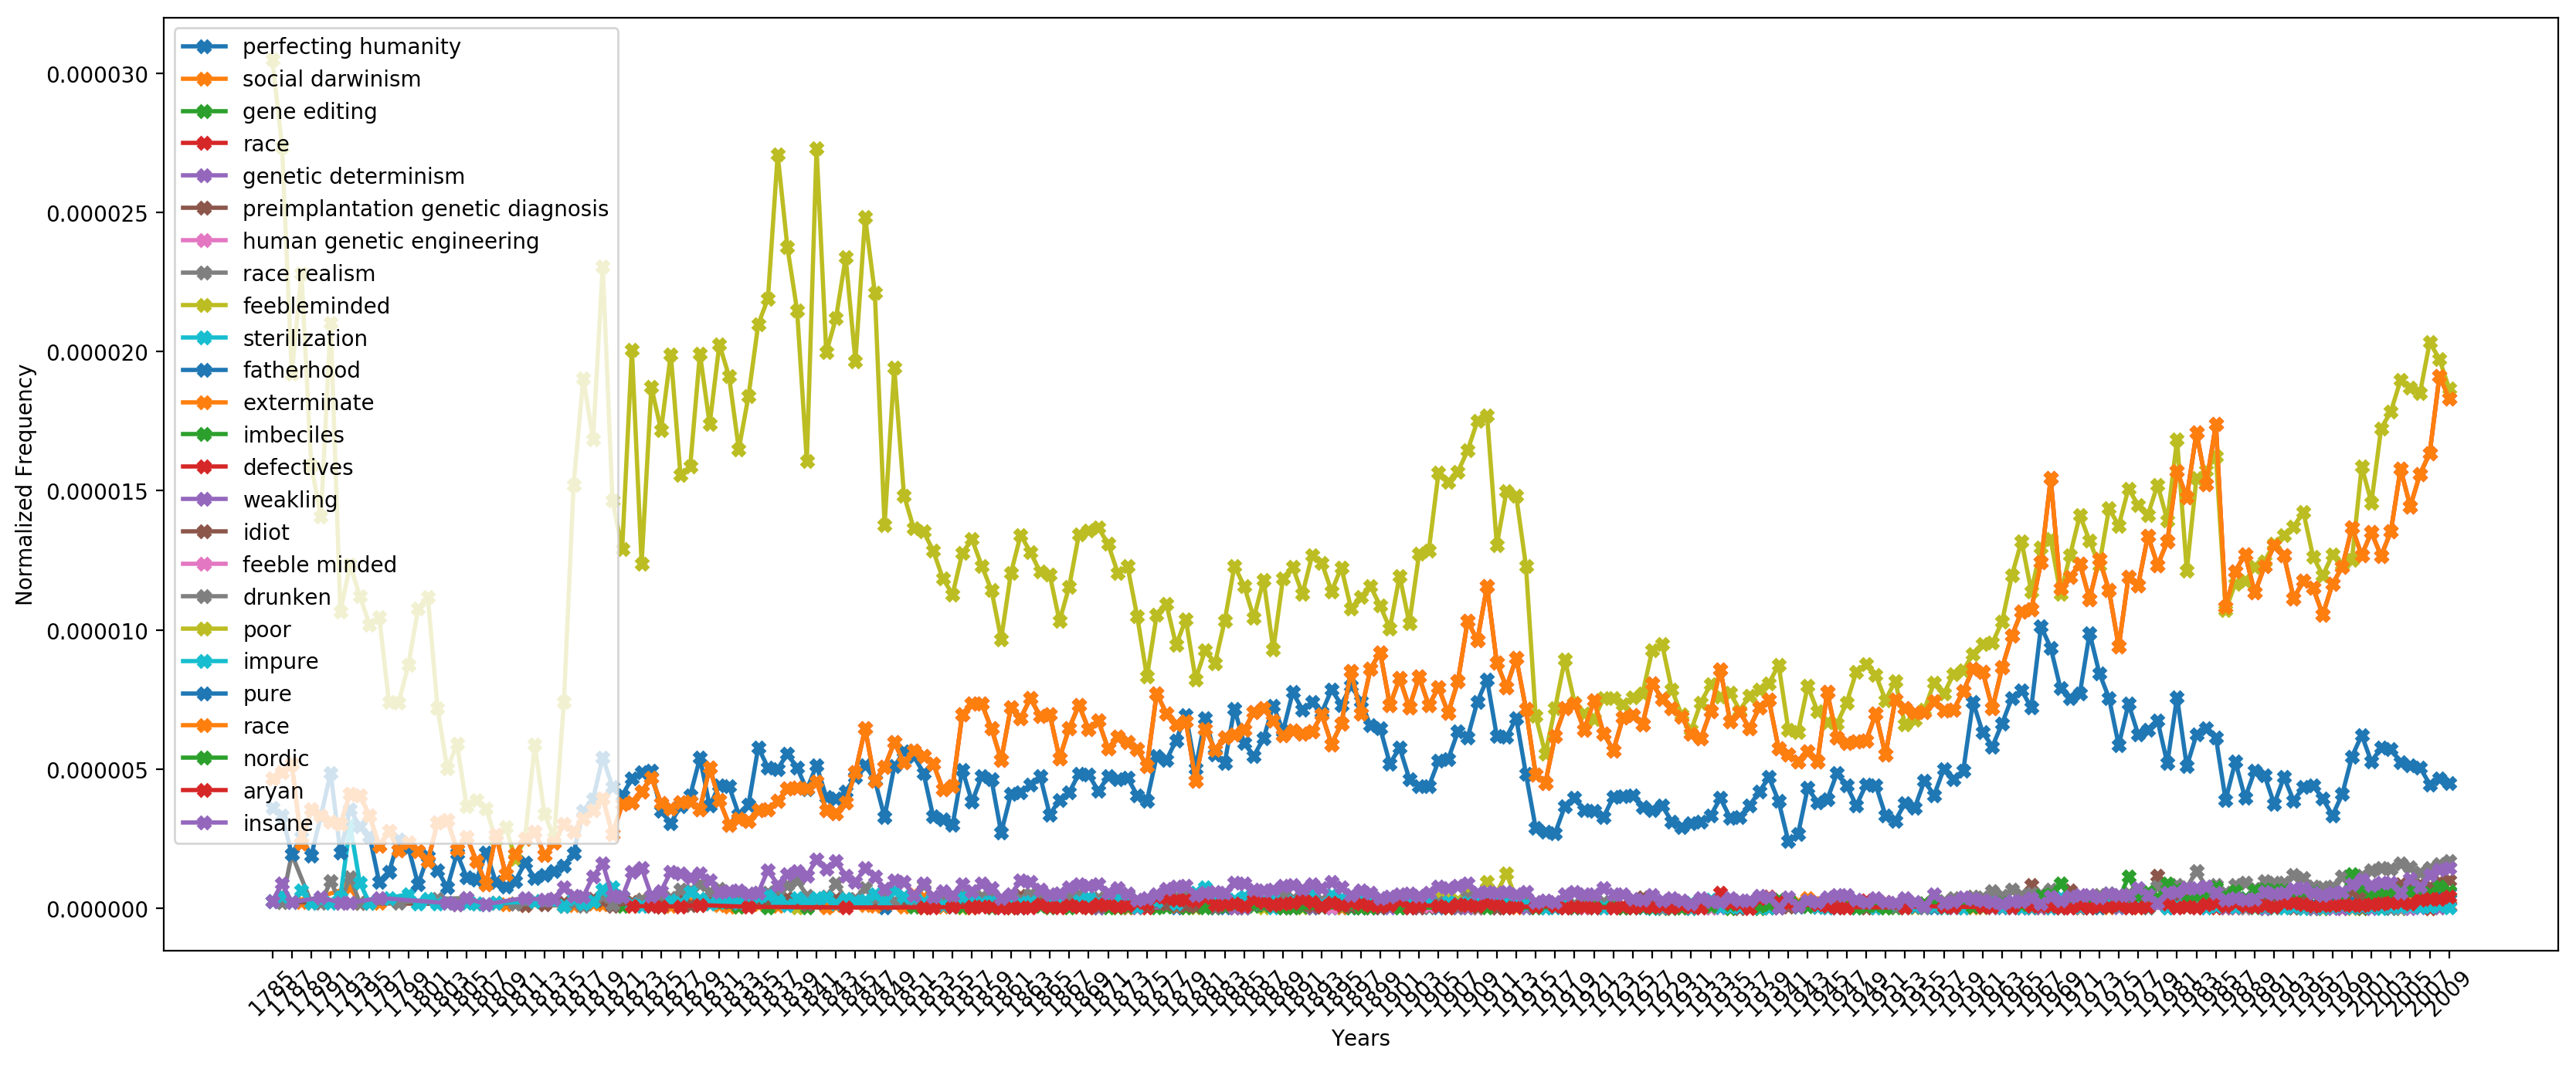

In [24]:
taxonomy_3= lexicon_norm[60:90]

query_results=read_query_results('results_science_norm')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_3
normalize_freq(norm_publication, freq_count_norm, taxonomy_3)

#### Without normalising - Visualising the raw frequencies of taxonomy 3

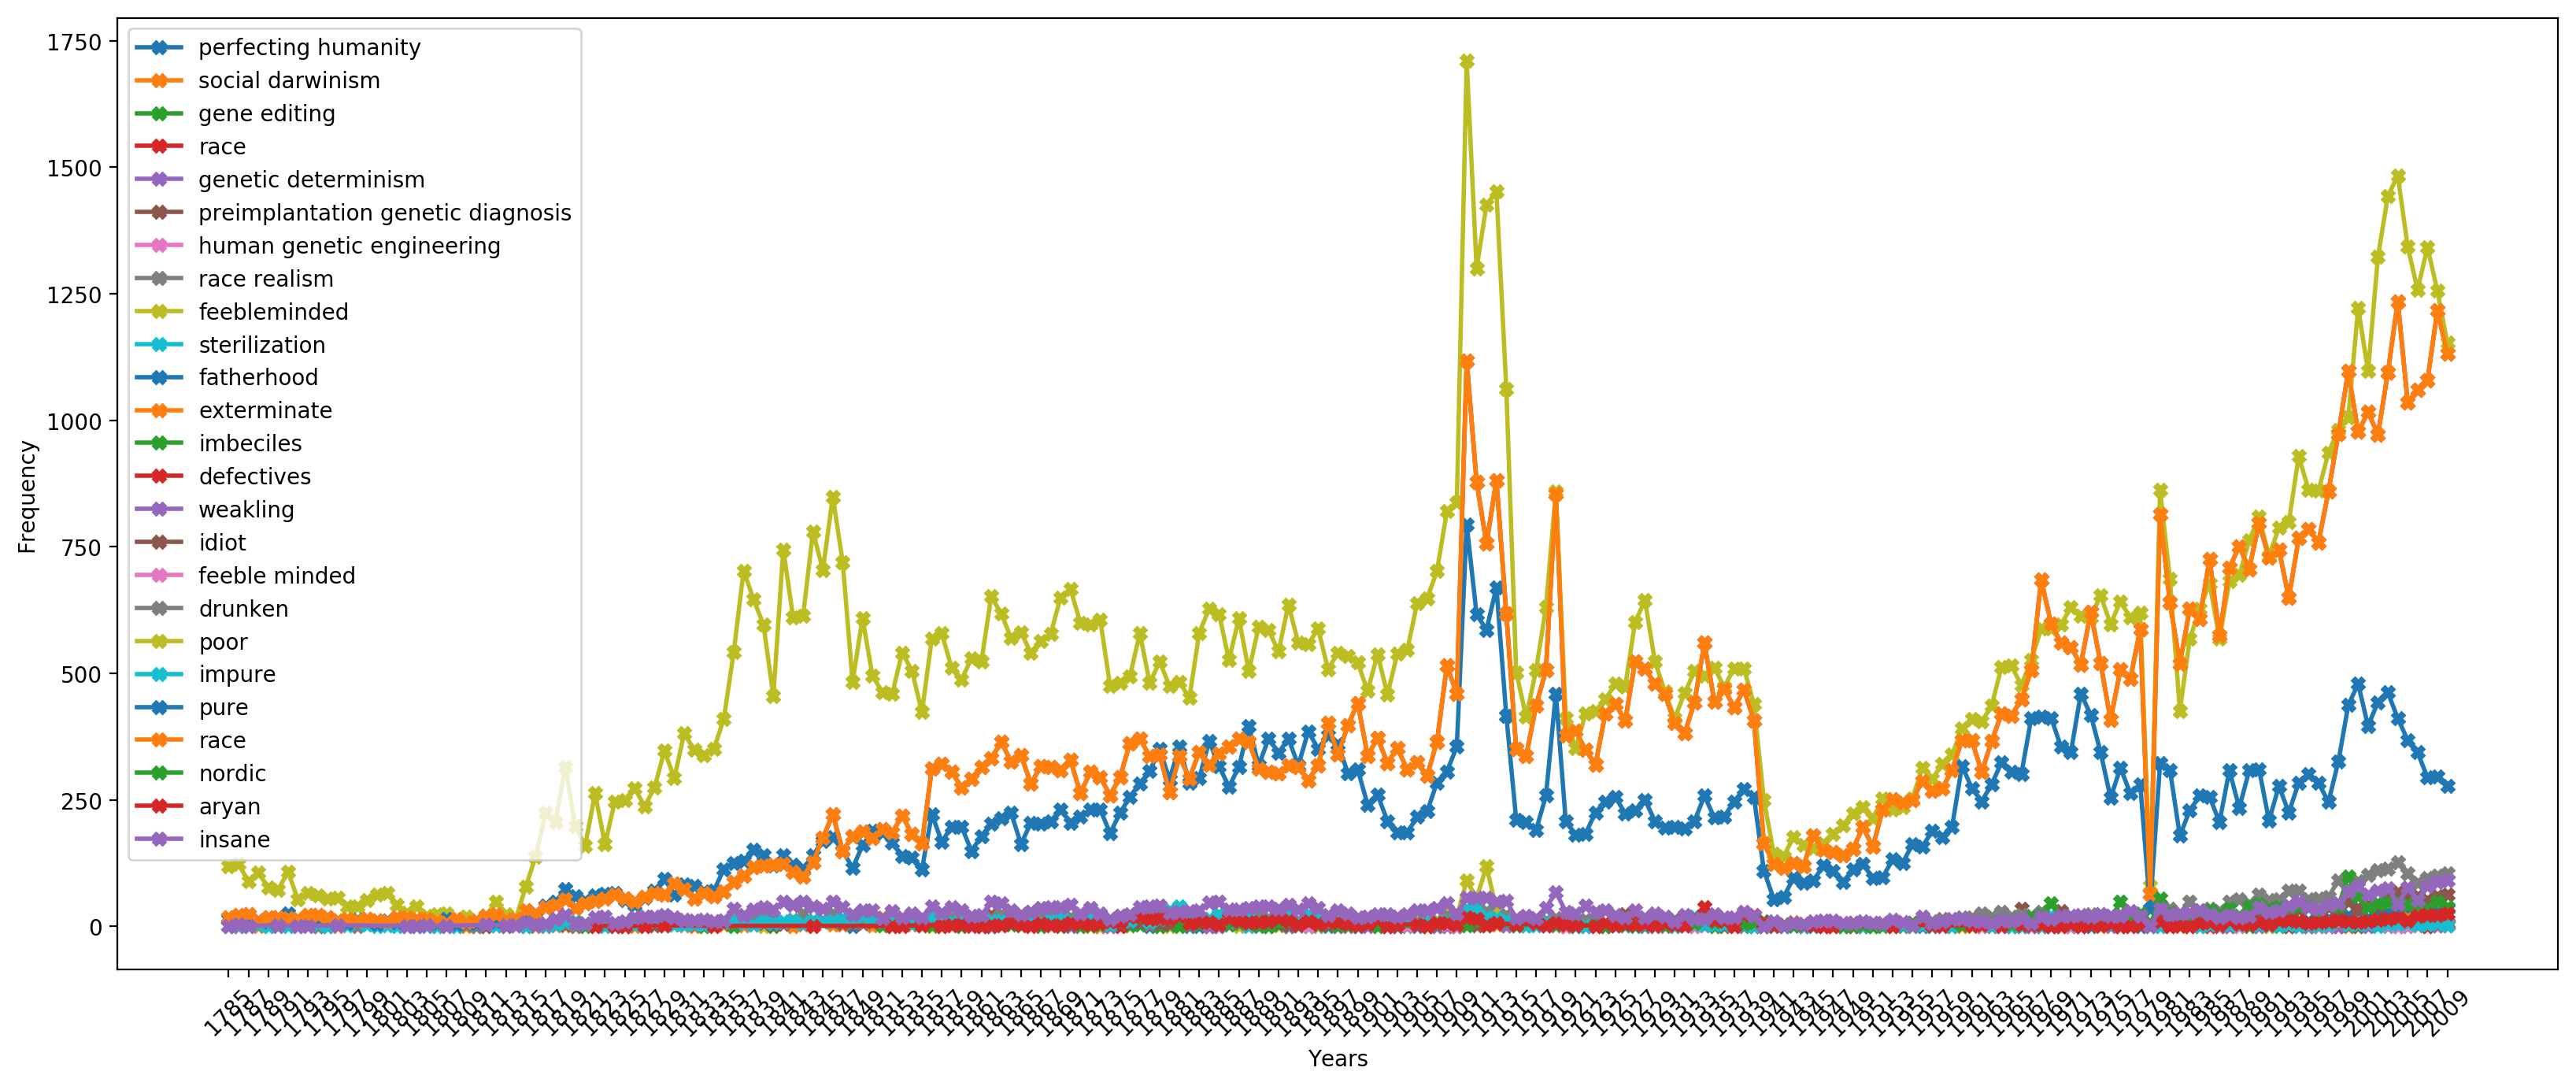

In [25]:
plot_freq_count(freq_count_norm, taxonomy_3)

#### Taxomomy_4

In [26]:
print("Terms used in Taxonomy 4: %s" %(' '.join(lexicon_norm[90:120]).replace(' ', ', ')))

Terms used in Taxonomy 4: inferior, racial, inferiors, defective, fit, unfit, undesirable, disabled, pureblood, ubermensch, unworthy, of, life, lives, unworthy, of, life, lebensunwertes, leben, euthanising, euthanasia, good, births, hereditary, defective, offspring, compulsory, sterilization, untermensch, fewer, children, restrict, welfare, degeneration, of, the, race, neoeugenics, mentally, defective, weak, genes, forced, sterilisation, breeding, circulation, nazi, eugenics, nazism, national, socialist, marriage, prohibition


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


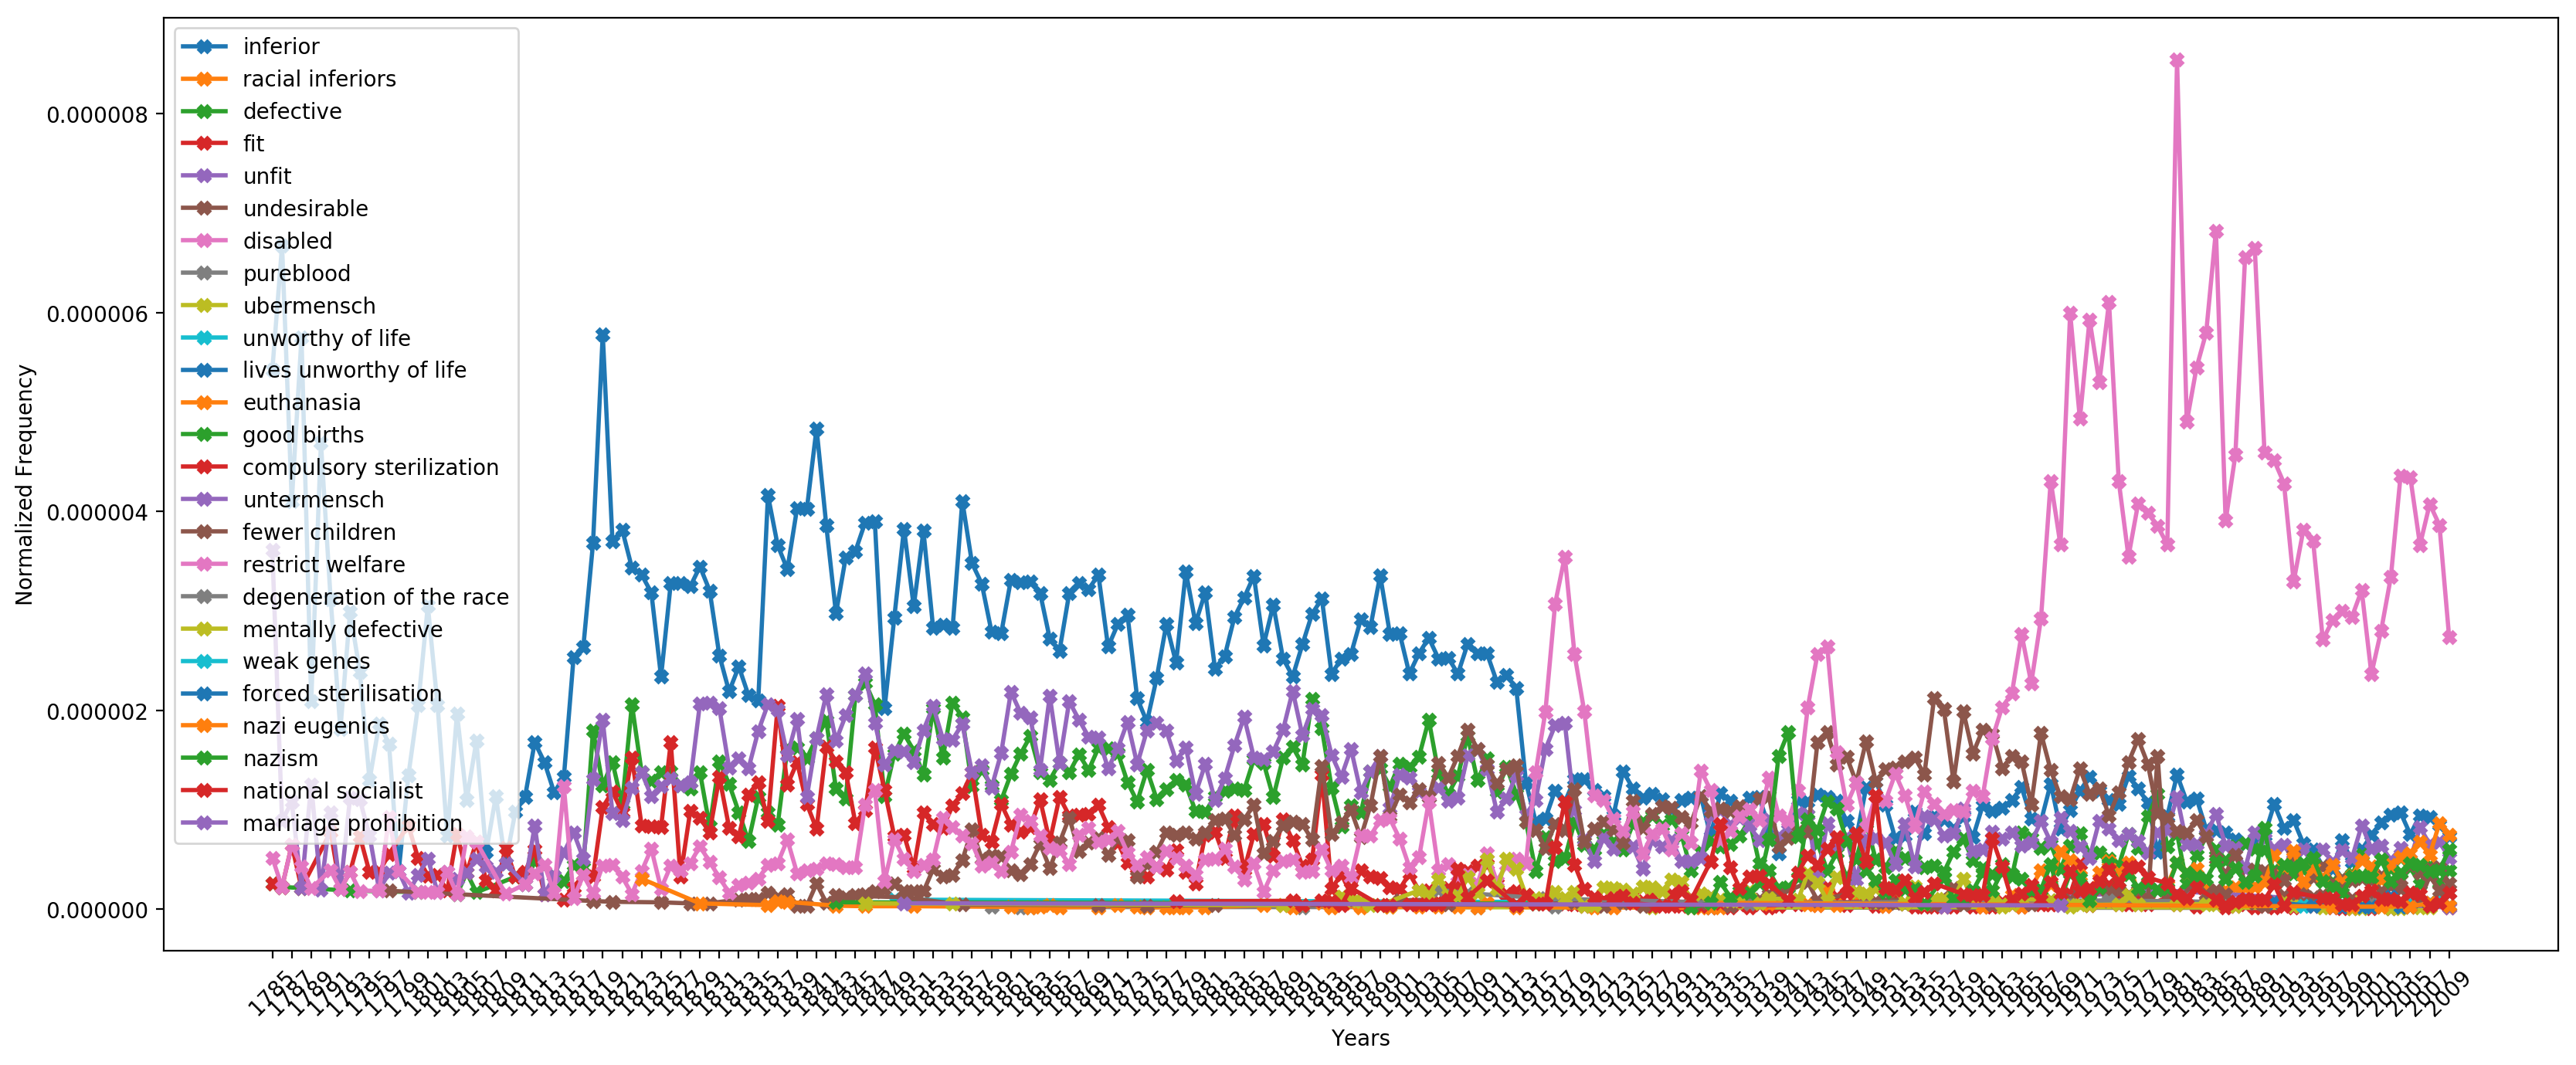

In [27]:
taxonomy_4= lexicon_norm[90:120]

query_results=read_query_results('results_science_norm')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_4
normalize_freq(norm_publication, freq_count_norm, taxonomy_4)

#### Without normalising - Visualising the raw frequencies of taxonomy 4

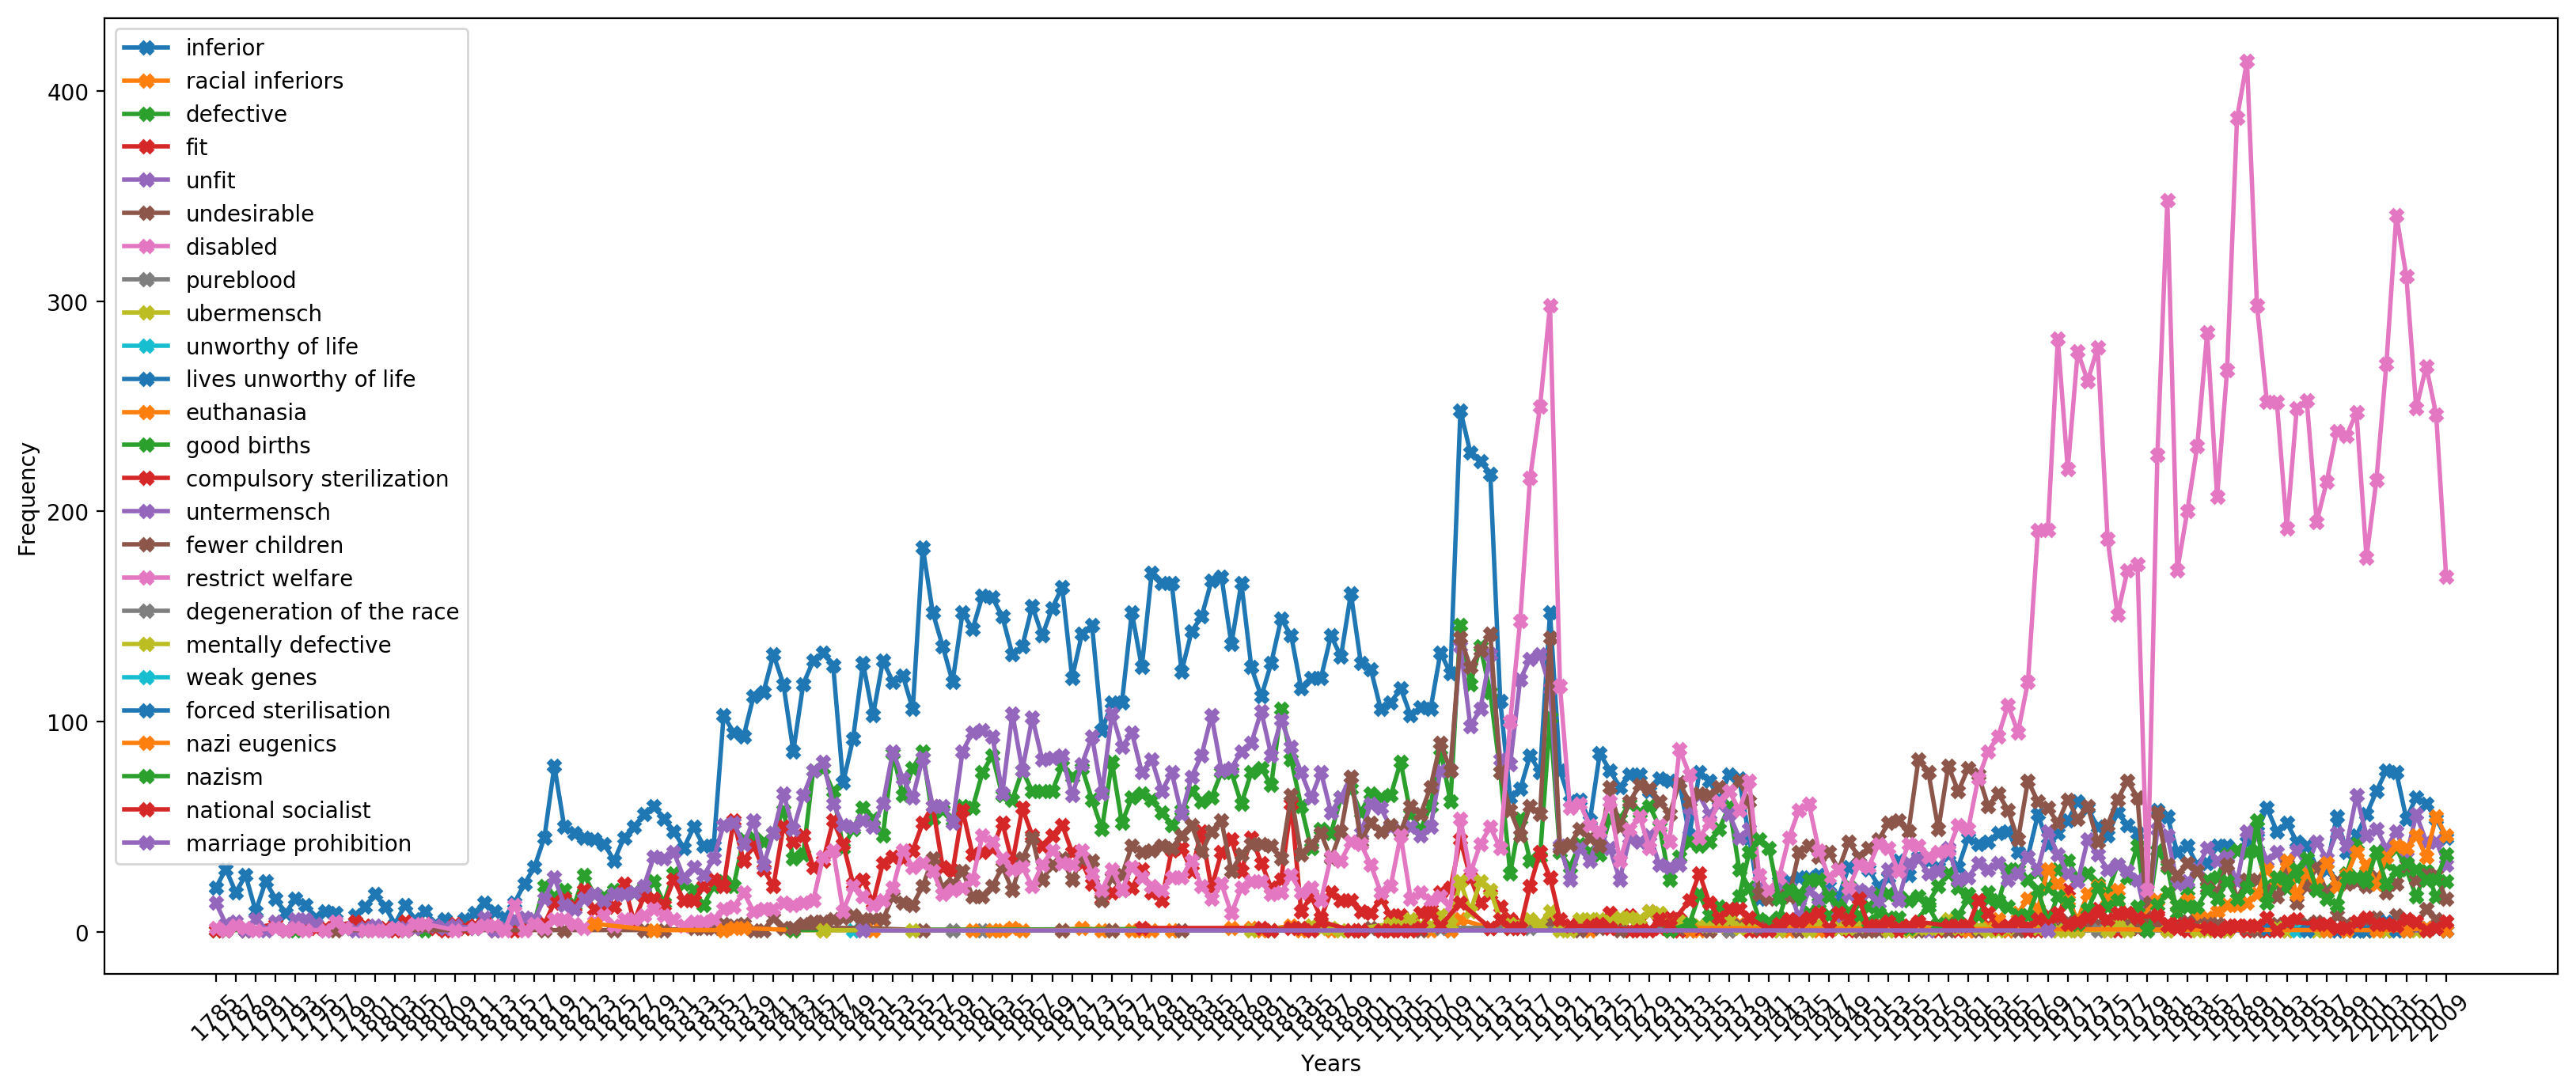

In [28]:
plot_freq_count(freq_count_norm, taxonomy_4)

#### Terms used (taxomomy_5):

In [29]:
print("Terms used in Taxonomy 5: %s" %(' '.join(lexicon_norm[120:]).replace(' ', ', ')))

Terms used in Taxonomy 5: sprint, boxing, iq, unfit, to, reproduce, genetic, quality, fit, to, reproduce, final, solution, human, stock, improving, human, stock, racial, mixing, defective, classes, racial, purity, selective, breeding, racial, hygiene, hereditary, biology, social, biology, asexual, morally, defective, francis, galton, alexander, graham, bell, margaret, sanger


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


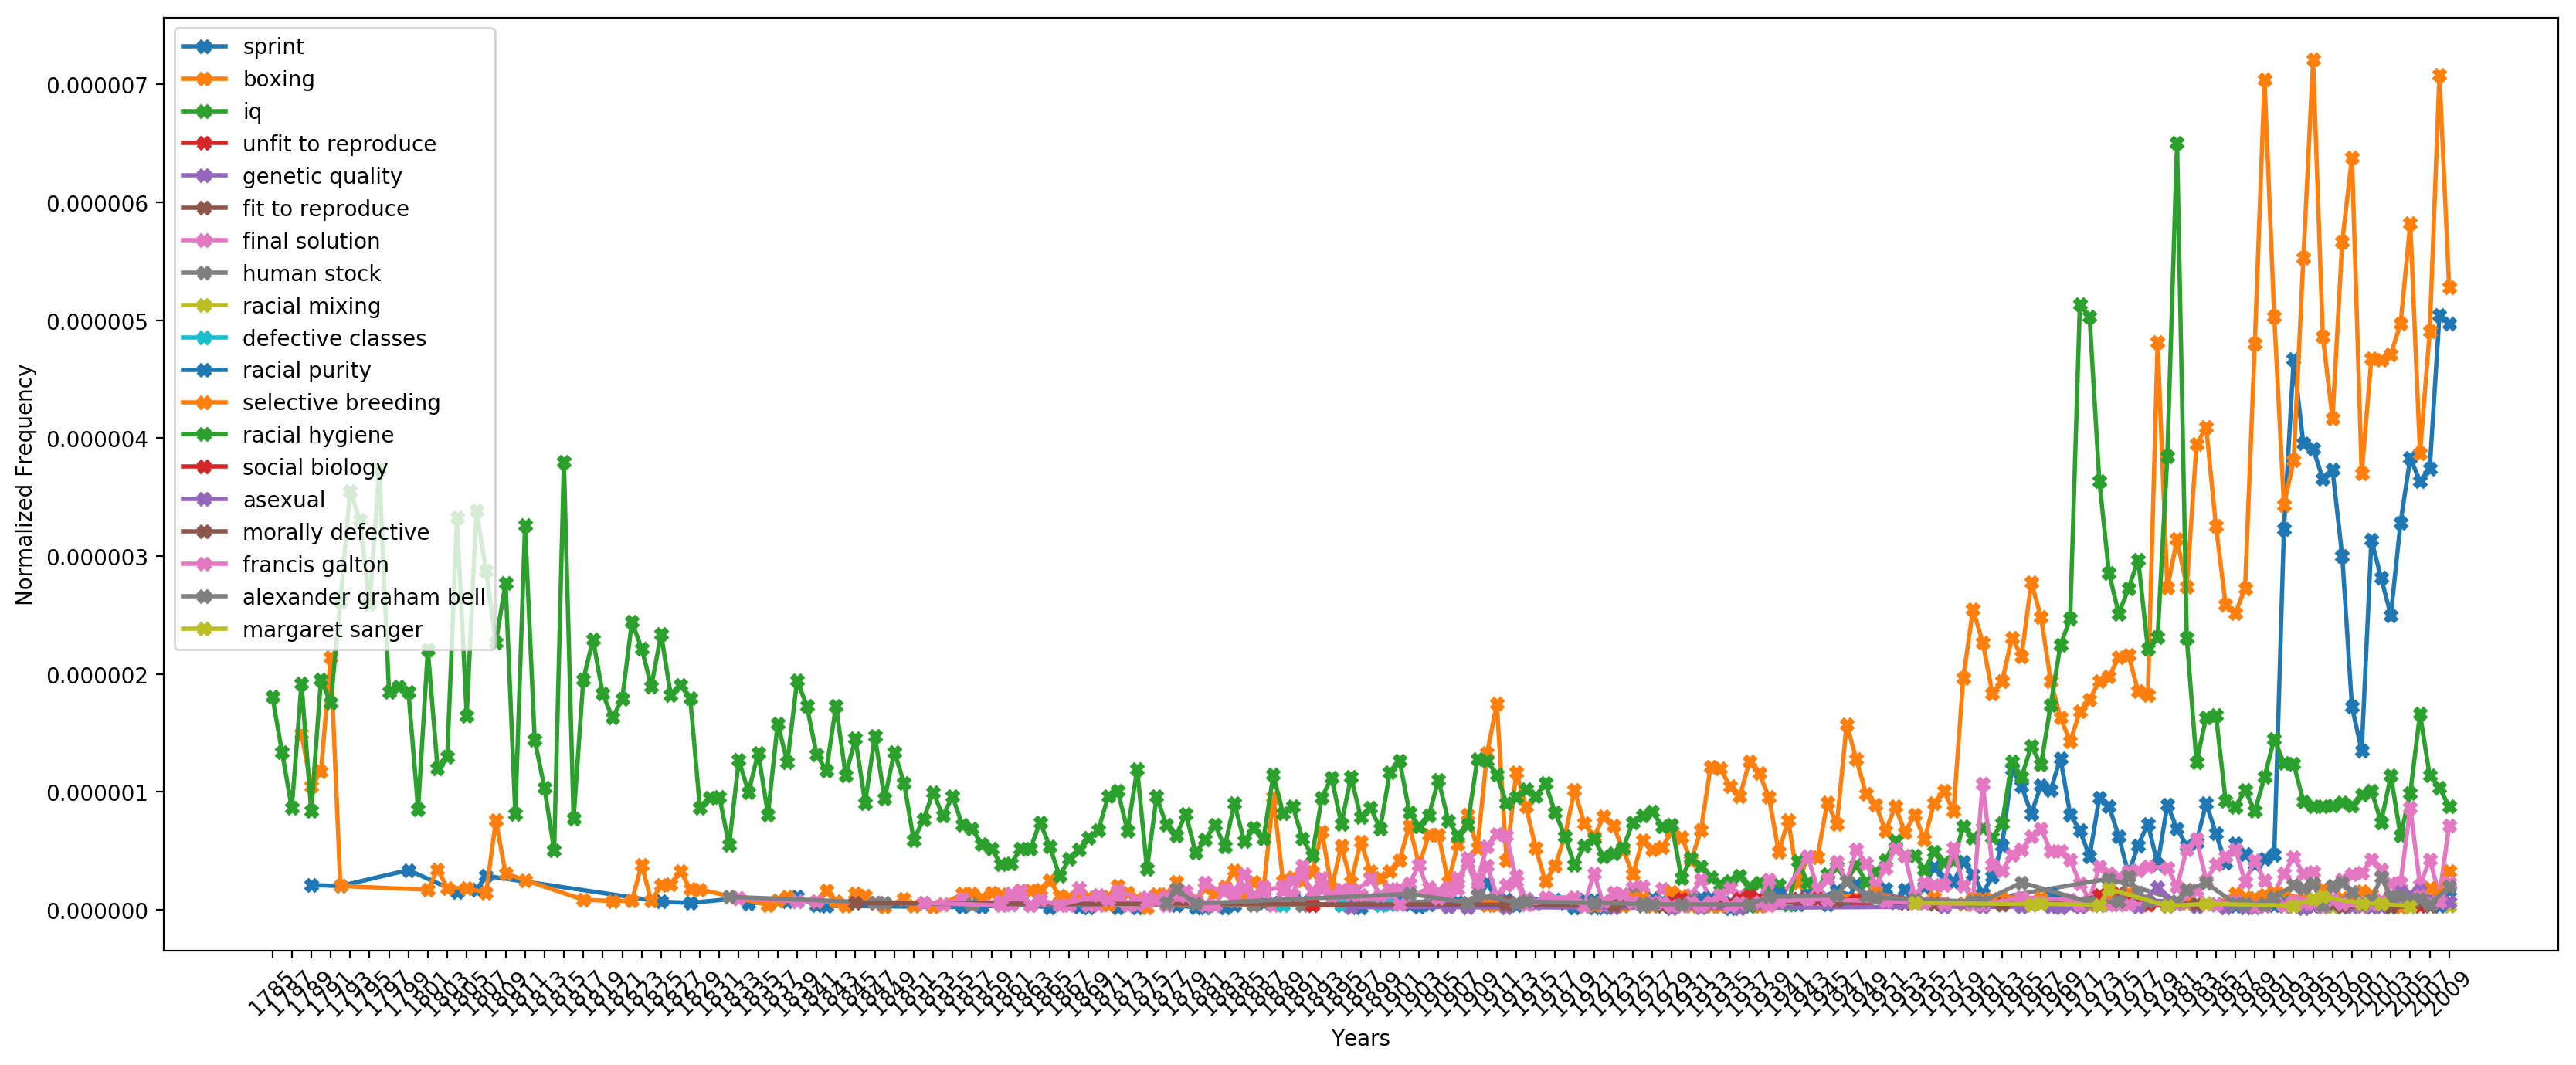

In [30]:
taxonomy_5= lexicon_norm[120:]

query_results=read_query_results('results_science_norm')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_5
normalize_freq(norm_publication, freq_count_norm, taxonomy_5)

#### Without normalising - Visualising the raw frequencies of taxonomy 5

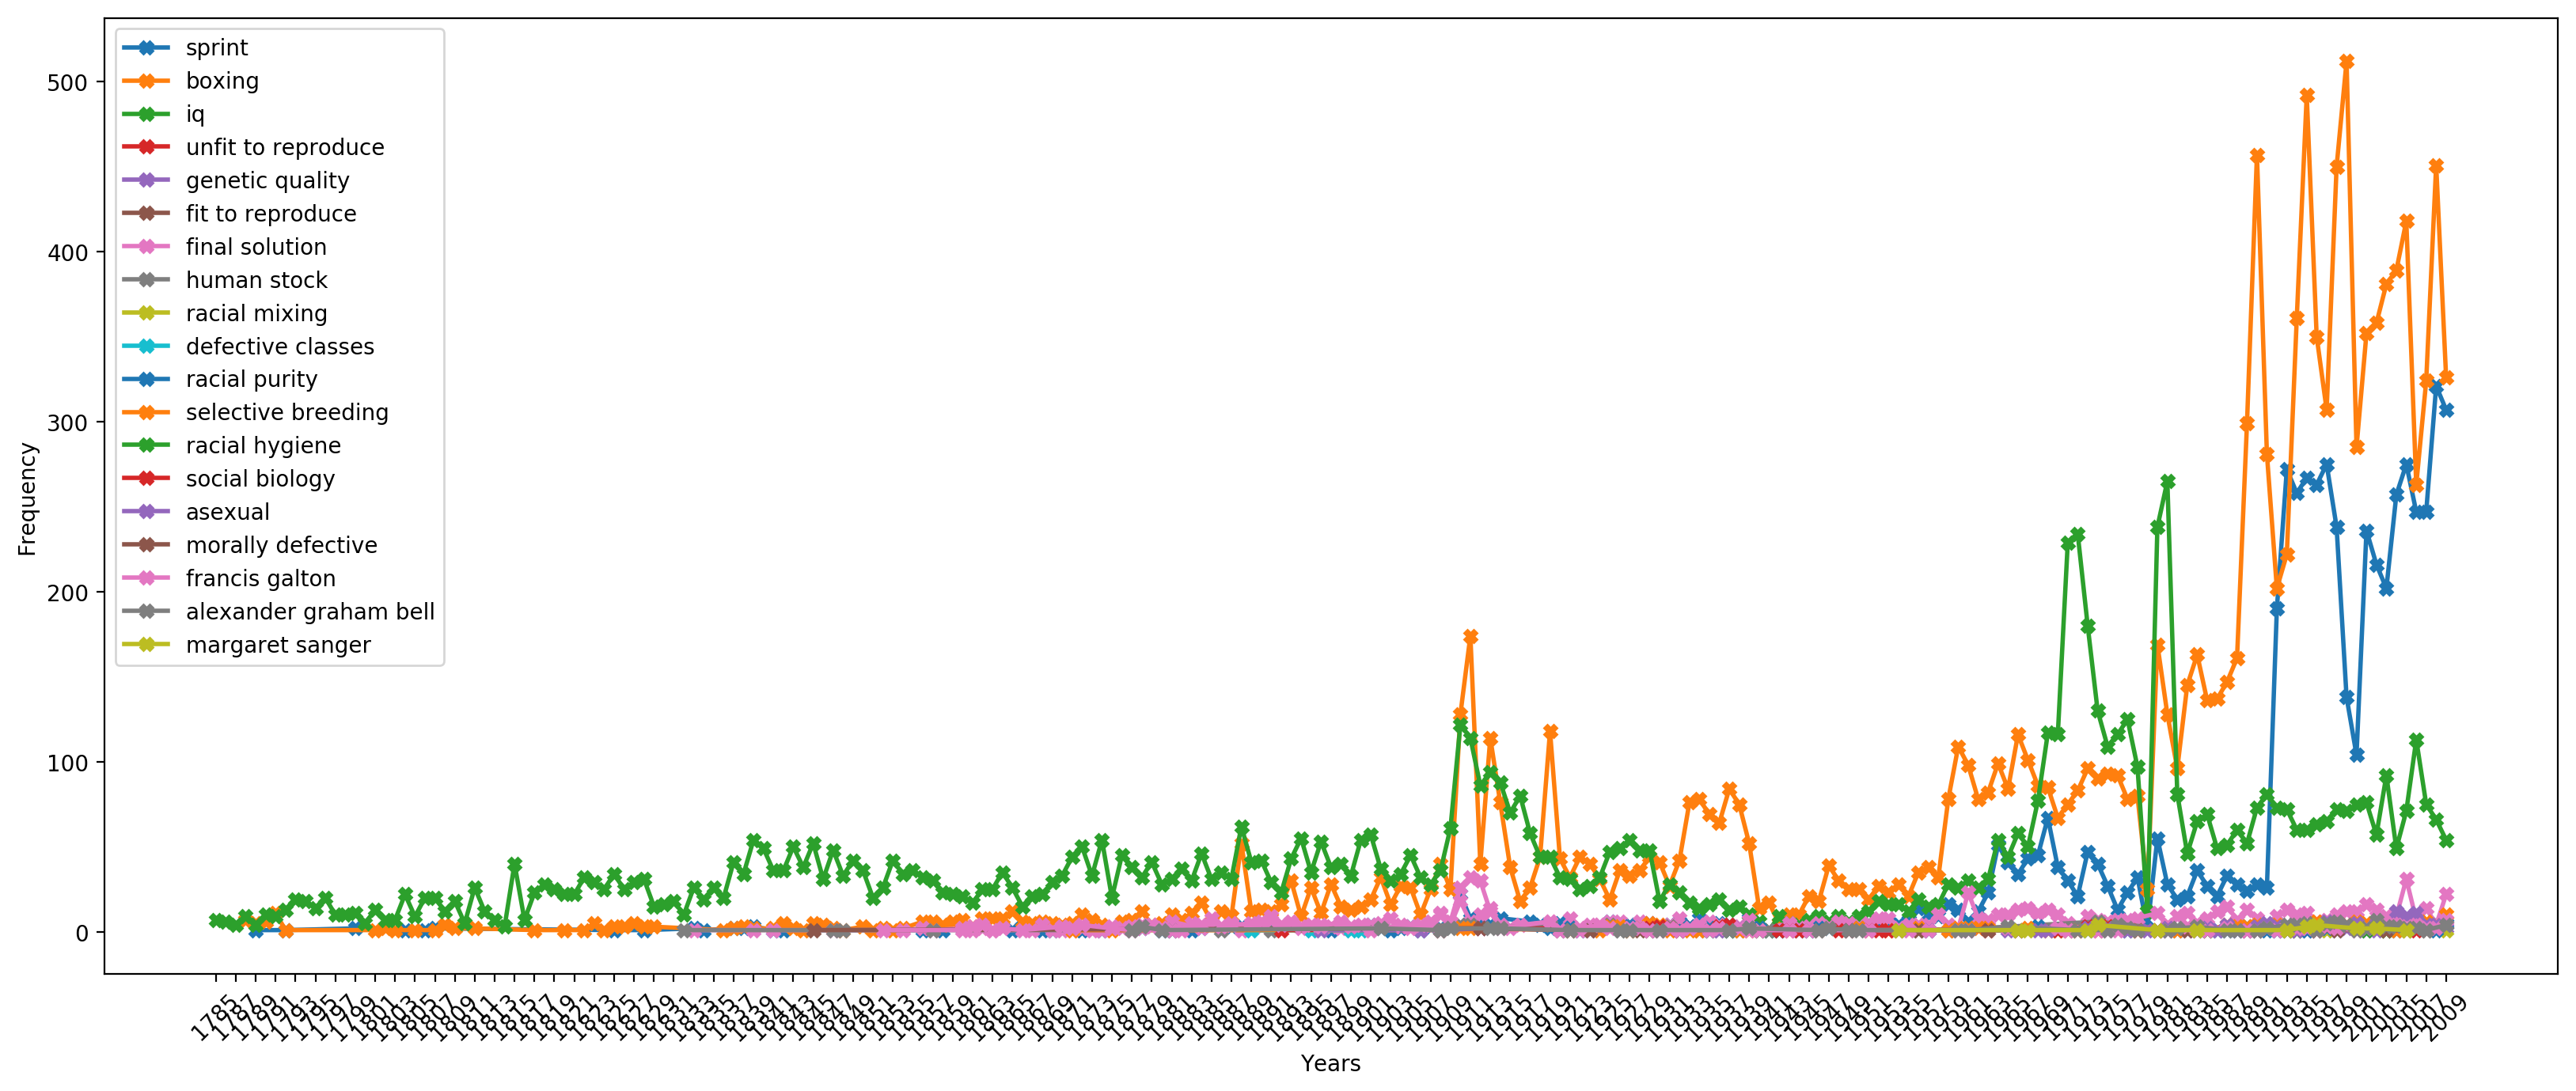

In [31]:
plot_freq_count(freq_count_norm, taxonomy_5)